# Deep Learning Applications: Laboratory #1

In this first laboratory we will work relatively simple architectures to get a feel for working with Deep Models. This notebook is designed to work with PyTorch, but as I said in the introductory lecture: please feel free to use and experiment with whatever tools you like.

**Important Notes**:
1. Be sure to **document** all of your decisions, as well as your intermediate and final results. Make sure your conclusions and analyses are clearly presented. Don't make us dig into your code or walls of printed results to try to draw conclusions from your code.
2. If you use code from someone else (e.g. Github, Stack Overflow, ChatGPT, etc) you **must be transparent about it**. Document your sources and explain how you adapted any partial solutions to creat **your** solution.



## Exercise 1: Warming Up
In this series of exercises I want you to try to duplicate (on a small scale) the results of the ResNet paper:

> [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385), Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun, CVPR 2016.

We will do this in steps using a Multilayer Perceptron on MNIST.

Recall that the main message of the ResNet paper is that **deeper** networks do not **guarantee** more reduction in training loss (or in validation accuracy). Below you will incrementally build a sequence of experiments to verify this for an MLP. A few guidelines:

+ I have provided some **starter** code at the beginning. **NONE** of this code should survive in your solutions. Not only is it **very** badly written, it is also written in my functional style that also obfuscates what it's doing (in part to **discourage** your reuse!). It's just to get you *started*.
+ These exercises ask you to compare **multiple** training runs, so it is **really** important that you factor this into your **pipeline**. Using [Tensorboard](https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html) is a **very** good idea -- or, even better [Weights and Biases](https://wandb.ai/site).
+ You may work and submit your solutions in **groups of at most two**. Share your ideas with everyone, but the solutions you submit *must be your own*.

First some boilerplate to get you started, then on to the actual exercises!

### Preface: Some code to get you started

What follows is some **very simple** code for training an MLP on MNIST. The point of this code is to get you up and running (and to verify that your Python environment has all needed dependencies).

**Note**: As you read through my code and execute it, this would be a good time to think about *abstracting* **your** model definition, and training and evaluation pipelines in order to make it easier to compare performance of different models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.datasets import MNIST
from torchvision.datasets import CIFAR10
from torchvision.datasets import CIFAR100
import torchvision.transforms as transforms
import random
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data.dataloader import DataLoader

import wandb
import gc 
gc.collect()
torch.cuda.empty_cache()

from myResNet.MyResnet import MyResNet
from Trainer.Trainer import Trainer

In [ ]:
wandb_key = ''
wandb.login(key=wandb_key)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/tommaso/.netrc
wandb: Currently logged in as: tommaso-ducci1 (tommaso-ducci1-university-of-florence) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

#### Data preparation

Here is some basic dataset loading, validation splitting code to get you started working with MNIST.

In [6]:
#Data Loading 

# Standard MNIST transform.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) #i numeri magici di media e varianza di MINST
])

# Load MNIST train and test.
ds_train = MNIST(root='./data', train=True, download=True, transform=transform) 
ds_test = MNIST(root='./data', train=False, download=True, transform=transform)                                           

#### Boilerplate training and evaluation code

This is some **very** rough training, evaluation, and plotting code. Again, just to get you started. I will be *very* disappointed if any of this code makes it into your final submission.

In [4]:
#see Trainer class

#### A basic, parameterized MLP

This is a very basic implementation of a Multilayer Perceptron. Don't waste too much time trying to figure out how it works -- the important detail is that it allows you to pass in a list of input, hidden layer, and output *widths*. **Your** implementation should also support this for the exercises to come.

In [5]:
#seee MyResNet class


### Exercise 1.1: A baseline MLP

Implement a *simple* Multilayer Perceptron to classify the 10 digits of MNIST (e.g. two *narrow* layers). Use my code above as inspiration, but implement your own training pipeline -- you will need it later. Train this model to convergence, monitoring (at least) the loss and accuracy on the training and validation sets for every epoch. Below I include a basic implementation to get you started -- remember that you should write your *own* pipeline!

**Note**: This would be a good time to think about *abstracting* your model definition, and training and evaluation pipelines in order to make it easier to compare performance of different models.

**Important**: Given the *many* runs you will need to do, and the need to *compare* performance between them, this would **also** be a great point to study how **Tensorboard** or **Weights and Biases** can be used for performance monitoring.

In [7]:
trainer_config = {
    "device": 'cuda', 
    "num_workers": 4, 
    "seed": 42
}

MLP = MyResNet(data_shape=[1,28,28], layers_tuple_list=[("Linear", 28*28,64,3,10, "ReLU")])


MLP_trainer = Trainer(config=trainer_config, model=MLP, dataset=ds_train, lr=0.001)
MLP_trainer.train(data_split = [0.3,0.7], batch_size = 256, num_epochs = 25, use_wandb=False, val_check=2, early_stopping=5)

running on device cuda


/home/tommaso/Documents/deep_learning/deep_learning_utils/src/Trainer/Trainer.py:295: UserWarning: Not uniform initial logits distribution!
  warnings.warn("Not uniform initial logits distribution!")
Training epoch 0: 100%|██████████| 165/165 [00:01<00:00, 132.48it/s]

Epoch 0/25, Average training loss: 0.5123


Epoch 0/25, Training accuracy: 0.9132


Validation epoch 0: 100%|██████████| 71/71 [00:00<00:00, 113.80it/s]

Epoch 0/25, Average validation loss: 0.3199


Epoch 0/25, Validation accuracy: 0.9098


Training epoch 1: 100%|██████████| 165/165 [00:01<00:00, 134.17it/s]

Epoch 1/25, Average training loss: 0.3075


Epoch 1/25, Training accuracy: 0.9186


Training epoch 2: 100%|██████████| 165/165 [00:01<00:00, 131.80it/s]

Epoch 2/25, Average training loss: 0.2937


Epoch 2/25, Training accuracy: 0.9175


Validation epoch 2: 100%|██████████| 71/71 [00:00<00:00, 122.38it/s]

Epoch 2/25, Average validation loss: 0.3108


Epoch 2/25, Validation accuracy: 0.9108


Training epoch 3: 100%|██████████| 165/165 [00:01<00:00, 137.07it/s]

Epoch 3/25, Average training loss: 0.2854


Epoch 3/25, Training accuracy: 0.9257


Training epoch 4: 100%|██████████| 165/165 [00:01<00:00, 128.75it/s]

Epoch 4/25, Average training loss: 0.2787


Epoch 4/25, Training accuracy: 0.9210


Validation epoch 4: 100%|██████████| 71/71 [00:00<00:00, 115.78it/s]

Epoch 4/25, Average validation loss: 0.3074


Epoch 4/25, Validation accuracy: 0.9158


Training epoch 5: 100%|██████████| 165/165 [00:01<00:00, 132.18it/s]

Epoch 5/25, Average training loss: 0.2763


Epoch 5/25, Training accuracy: 0.9249


Training epoch 6: 100%|██████████| 165/165 [00:01<00:00, 126.59it/s]

Epoch 6/25, Average training loss: 0.2715


Epoch 6/25, Training accuracy: 0.9232


Validation epoch 6: 100%|██████████| 71/71 [00:00<00:00, 114.24it/s]

Epoch 6/25, Average validation loss: 0.3127


Epoch 6/25, Validation accuracy: 0.9142


Training epoch 7: 100%|██████████| 165/165 [00:01<00:00, 130.35it/s]

Epoch 7/25, Average training loss: 0.2732


Epoch 7/25, Training accuracy: 0.9252


Training epoch 8: 100%|██████████| 165/165 [00:01<00:00, 124.90it/s]

Epoch 8/25, Average training loss: 0.2681


Epoch 8/25, Training accuracy: 0.9266


Validation epoch 8: 100%|██████████| 71/71 [00:00<00:00, 108.73it/s]

Epoch 8/25, Average validation loss: 0.3058


Epoch 8/25, Validation accuracy: 0.9192


Training epoch 9: 100%|██████████| 165/165 [00:01<00:00, 129.87it/s]

Epoch 9/25, Average training loss: 0.2698


Epoch 9/25, Training accuracy: 0.9186


Training epoch 10: 100%|██████████| 165/165 [00:01<00:00, 126.25it/s]

Epoch 10/25, Average training loss: 0.2647


Epoch 10/25, Training accuracy: 0.9258


Validation epoch 10: 100%|██████████| 71/71 [00:00<00:00, 117.80it/s]

Epoch 10/25, Average validation loss: 0.3069


Epoch 10/25, Validation accuracy: 0.9168


Training epoch 11: 100%|██████████| 165/165 [00:01<00:00, 135.85it/s]

Epoch 11/25, Average training loss: 0.2603


Epoch 11/25, Training accuracy: 0.9306


Training epoch 12: 100%|██████████| 165/165 [00:01<00:00, 123.24it/s]

Epoch 12/25, Average training loss: 0.2585


Epoch 12/25, Training accuracy: 0.9240


Validation epoch 12: 100%|██████████| 71/71 [00:00<00:00, 115.80it/s]

Epoch 12/25, Average validation loss: 0.3041


Epoch 12/25, Validation accuracy: 0.9150


Training epoch 13: 100%|██████████| 165/165 [00:01<00:00, 121.59it/s]

Epoch 13/25, Average training loss: 0.2580


Epoch 13/25, Training accuracy: 0.9280


Training epoch 14: 100%|██████████| 165/165 [00:01<00:00, 124.20it/s]

Epoch 14/25, Average training loss: 0.2608


Epoch 14/25, Training accuracy: 0.9285


Validation epoch 14: 100%|██████████| 71/71 [00:00<00:00, 110.38it/s]

Epoch 14/25, Average validation loss: 0.3091


Epoch 14/25, Validation accuracy: 0.9170


Training epoch 15: 100%|██████████| 165/165 [00:01<00:00, 129.58it/s]

Epoch 15/25, Average training loss: 0.2546


Epoch 15/25, Training accuracy: 0.9316


Training epoch 16: 100%|██████████| 165/165 [00:01<00:00, 123.81it/s]

Epoch 16/25, Average training loss: 0.2600


Epoch 16/25, Training accuracy: 0.9305


Validation epoch 16: 100%|██████████| 71/71 [00:00<00:00, 117.60it/s]

Epoch 16/25, Average validation loss: 0.3062


Epoch 16/25, Validation accuracy: 0.9156


Training epoch 17: 100%|██████████| 165/165 [00:01<00:00, 116.46it/s]

Epoch 17/25, Average training loss: 0.2628


Epoch 17/25, Training accuracy: 0.9271


Training epoch 18: 100%|██████████| 165/165 [00:01<00:00, 121.56it/s]

Epoch 18/25, Average training loss: 0.2576


Epoch 18/25, Training accuracy: 0.9253


Validation epoch 18: 100%|██████████| 71/71 [00:00<00:00, 115.10it/s]

Epoch 18/25, Average validation loss: 0.3175


Epoch 18/25, Validation accuracy: 0.9151
Early stopping triggered!


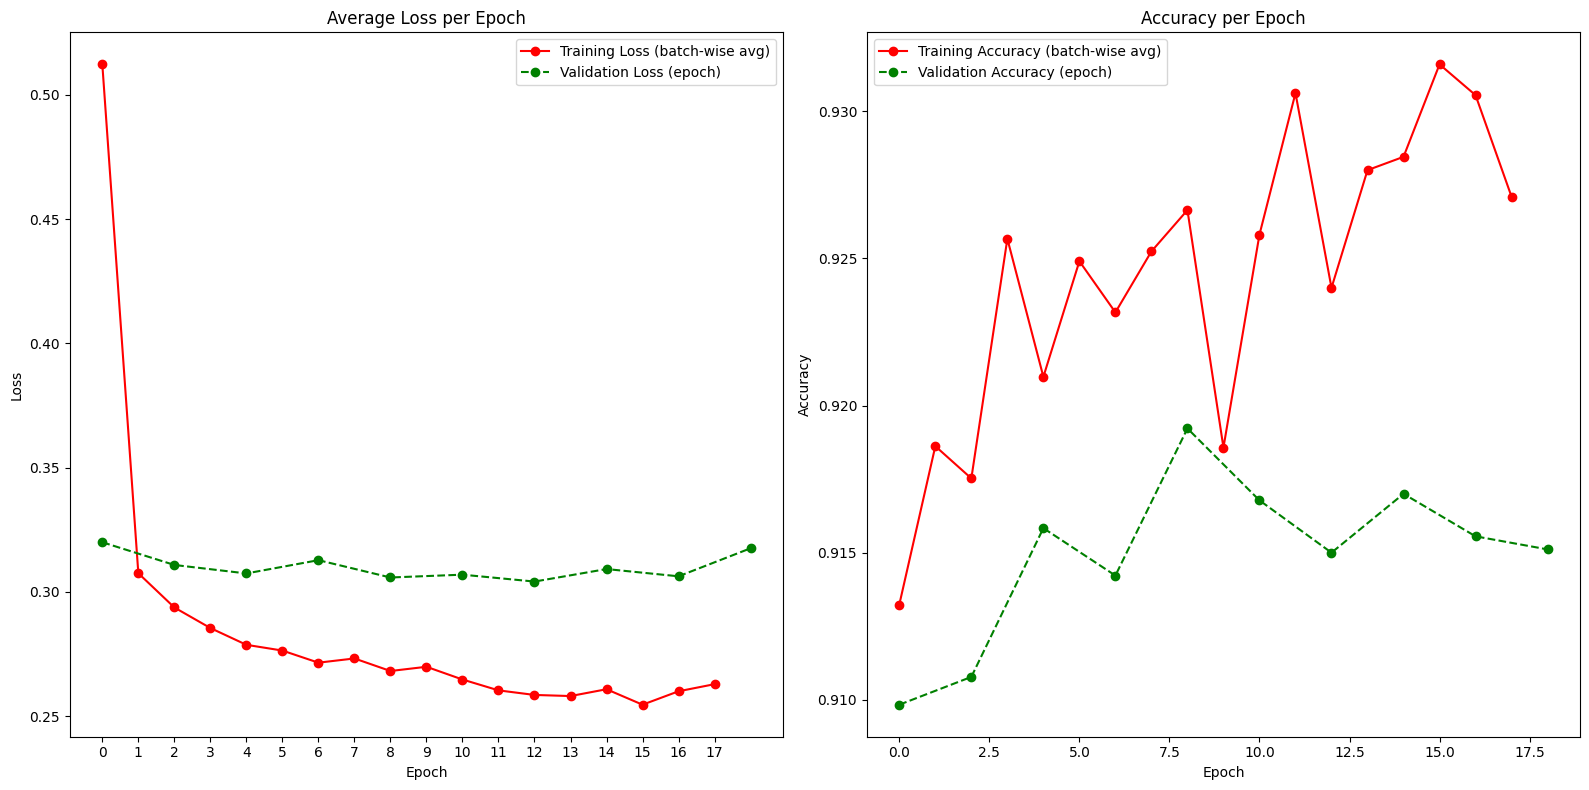

In [8]:
MLP_trainer.plot_curves()

In [ ]:
del MLP

### Exercise 1.2: Adding Residual Connections

Implement a variant of your parameterized MLP network to support **residual** connections. Your network should be defined as a composition of **residual MLP** blocks that have one or more linear layers and add a skip connection from the block input to the output of the final linear layer.

**Compare** the performance (in training/validation loss and test accuracy) of your MLP and ResidualMLP for a range of depths. Verify that deeper networks **with** residual connections are easier to train than a network of the same depth **without** residual connections.

**For extra style points**: See if you can explain by analyzing the gradient magnitudes on a single training batch *why* this is the case. 

In [14]:
trainer_config = {
    "device": 'cuda', 
    "num_workers": 4, 
    "seed": 42
}
depths = [3,5,7,9]
no_skip_summaries = list()
no_skip_epochs = list()
no_skip_test_accs = list()
skip_summaries = list()
skip_epochs = list()
skip_test_accs = list()


for depth in depths:
   deep_MLPwith_skip = MyResNet(data_shape=[1,28,28], layers_tuple_list=[("Linear", 28*28,64,depth,10, "ReLU")], skip_dict={0:1,(depth-1):depth})
   deep_MLP_trainer_skip = Trainer(config=trainer_config, model=deep_MLPwith_skip, dataset=ds_train, lr=0.0001)
   deep_MLP_trainer_skip.train(data_split = [0.3,0.7], batch_size = 256, num_epochs = 20, use_wandb=False, val_check = 2, early_stopping = 3)
   loss,acc = deep_MLPwith_skip.test(ds_test)

   skip_summaries.append(deep_MLP_trainer_skip.get_summary())
   skip_epochs.append(len(deep_MLP_trainer_skip.history['train_loss']))
   skip_test_accs.append(acc)

   del deep_MLPwith_skip
   del deep_MLP_trainer_skip

   deep_MLPno_skip = MyResNet(data_shape=[1,28,28], layers_tuple_list=[("Linear", 28*28,64,depth,10, "ReLU")])
   deep_MLP_trainer_no_skip = Trainer(config=trainer_config, model=deep_MLPno_skip, dataset=ds_train, lr=0.0001)
   deep_MLP_trainer_no_skip.train(data_split = [0.3,0.7], batch_size = 256, num_epochs = 20, use_wandb=False, val_check = 2, early_stopping = 3)
   loss,acc = deep_MLPno_skip.test(ds_test)
   
   no_skip_summaries.append(deep_MLP_trainer_no_skip.get_summary())
   no_skip_epochs.append(len(deep_MLP_trainer_no_skip.history['train_loss']))
   no_skip_test_accs.append(acc)
   del deep_MLPno_skip
   del deep_MLP_trainer_no_skip

running on device cuda


Training epoch 0: 100%|██████████| 165/165 [00:01<00:00, 143.26it/s]

Epoch 0/20, Average training loss: 1.2728


Epoch 0/20, Training accuracy: 0.8472


Validation epoch 0: 100%|██████████| 71/71 [00:00<00:00, 130.37it/s]

Epoch 0/20, Average validation loss: 0.6239


Epoch 0/20, Validation accuracy: 0.8480


Training epoch 1: 100%|██████████| 165/165 [00:01<00:00, 126.72it/s]

Epoch 1/20, Average training loss: 0.4805


Epoch 1/20, Training accuracy: 0.8909


Training epoch 2: 100%|██████████| 165/165 [00:01<00:00, 136.36it/s]

Epoch 2/20, Average training loss: 0.3661


Epoch 2/20, Training accuracy: 0.9048


Validation epoch 2: 100%|██████████| 71/71 [00:00<00:00, 124.79it/s]

Epoch 2/20, Average validation loss: 0.3465


Epoch 2/20, Validation accuracy: 0.9018


Training epoch 3: 100%|██████████| 165/165 [00:01<00:00, 136.78it/s]

Epoch 3/20, Average training loss: 0.3282


Epoch 3/20, Training accuracy: 0.9105


Training epoch 4: 100%|██████████| 165/165 [00:01<00:00, 142.94it/s]

Epoch 4/20, Average training loss: 0.3082


Epoch 4/20, Training accuracy: 0.9144


Validation epoch 4: 100%|██████████| 71/71 [00:00<00:00, 115.34it/s]

Epoch 4/20, Average validation loss: 0.3123


Epoch 4/20, Validation accuracy: 0.9119


Training epoch 5: 100%|██████████| 165/165 [00:01<00:00, 141.25it/s]

Epoch 5/20, Average training loss: 0.2962


Epoch 5/20, Training accuracy: 0.9173


Training epoch 6: 100%|██████████| 165/165 [00:01<00:00, 133.43it/s]

Epoch 6/20, Average training loss: 0.2887


Epoch 6/20, Training accuracy: 0.9192


Validation epoch 6: 100%|██████████| 71/71 [00:00<00:00, 120.82it/s]

Epoch 6/20, Average validation loss: 0.2987


Epoch 6/20, Validation accuracy: 0.9169


Training epoch 7: 100%|██████████| 165/165 [00:01<00:00, 134.65it/s]

Epoch 7/20, Average training loss: 0.2825


Epoch 7/20, Training accuracy: 0.9211


Training epoch 8: 100%|██████████| 165/165 [00:01<00:00, 125.13it/s]

Epoch 8/20, Average training loss: 0.2784


Epoch 8/20, Training accuracy: 0.9233


Validation epoch 8: 100%|██████████| 71/71 [00:00<00:00, 114.51it/s]

Epoch 8/20, Average validation loss: 0.2924


Epoch 8/20, Validation accuracy: 0.9184


Training epoch 9: 100%|██████████| 165/165 [00:01<00:00, 138.58it/s]

Epoch 9/20, Average training loss: 0.2737


Epoch 9/20, Training accuracy: 0.9225


Training epoch 10: 100%|██████████| 165/165 [00:01<00:00, 128.68it/s]

Epoch 10/20, Average training loss: 0.2720


Epoch 10/20, Training accuracy: 0.9244


Validation epoch 10: 100%|██████████| 71/71 [00:00<00:00, 108.93it/s]

Epoch 10/20, Average validation loss: 0.2880


Epoch 10/20, Validation accuracy: 0.9201


Training epoch 11: 100%|██████████| 165/165 [00:01<00:00, 130.22it/s]

Epoch 11/20, Average training loss: 0.2733


Epoch 11/20, Training accuracy: 0.9247


Training epoch 12: 100%|██████████| 165/165 [00:01<00:00, 126.02it/s]

Epoch 12/20, Average training loss: 0.2674


Epoch 12/20, Training accuracy: 0.9255


Validation epoch 12: 100%|██████████| 71/71 [00:00<00:00, 115.46it/s]

Epoch 12/20, Average validation loss: 0.2887


Epoch 12/20, Validation accuracy: 0.9201


Training epoch 13: 100%|██████████| 165/165 [00:01<00:00, 136.23it/s]

Epoch 13/20, Average training loss: 0.2655


Epoch 13/20, Training accuracy: 0.9262


Training epoch 14: 100%|██████████| 165/165 [00:01<00:00, 133.90it/s]

Epoch 14/20, Average training loss: 0.2639


Epoch 14/20, Training accuracy: 0.9270


Validation epoch 14: 100%|██████████| 71/71 [00:00<00:00, 107.24it/s]

Epoch 14/20, Average validation loss: 0.2868


Epoch 14/20, Validation accuracy: 0.9226


Training epoch 15: 100%|██████████| 165/165 [00:01<00:00, 135.29it/s]

Epoch 15/20, Average training loss: 0.2613


Epoch 15/20, Training accuracy: 0.9276


Training epoch 16: 100%|██████████| 165/165 [00:01<00:00, 122.52it/s]

Epoch 16/20, Average training loss: 0.2604


Epoch 16/20, Training accuracy: 0.9268


Validation epoch 16: 100%|██████████| 71/71 [00:00<00:00, 117.40it/s]

Epoch 16/20, Average validation loss: 0.2871


Epoch 16/20, Validation accuracy: 0.9225


Training epoch 17: 100%|██████████| 165/165 [00:01<00:00, 124.25it/s]

Epoch 17/20, Average training loss: 0.2576


Epoch 17/20, Training accuracy: 0.9285


Training epoch 18: 100%|██████████| 165/165 [00:01<00:00, 130.33it/s]

Epoch 18/20, Average training loss: 0.2567


Epoch 18/20, Training accuracy: 0.9281


Validation epoch 18: 100%|██████████| 71/71 [00:00<00:00, 118.00it/s]

Epoch 18/20, Average validation loss: 0.2882


Epoch 18/20, Validation accuracy: 0.9219


Training epoch 19: 100%|██████████| 165/165 [00:01<00:00, 124.72it/s]

Epoch 19/20, Average training loss: 0.2563


Epoch 19/20, Training accuracy: 0.9296
Test set  loss: 0.2681, accuracy: 0.9249
running on device cuda
Initial checks passed succesfully


Training epoch 0: 100%|██████████| 165/165 [00:01<00:00, 120.23it/s]

Epoch 0/20, Average training loss: 1.4243


Epoch 0/20, Training accuracy: 0.8246


Validation epoch 0: 100%|██████████| 71/71 [00:00<00:00, 117.22it/s]

Epoch 0/20, Average validation loss: 0.7200


Epoch 0/20, Validation accuracy: 0.8271


Training epoch 1: 100%|██████████| 165/165 [00:01<00:00, 126.76it/s]

Epoch 1/20, Average training loss: 0.5338


Epoch 1/20, Training accuracy: 0.8828


Training epoch 2: 100%|██████████| 165/165 [00:01<00:00, 124.24it/s]

Epoch 2/20, Average training loss: 0.3876


Epoch 2/20, Training accuracy: 0.8979


Validation epoch 2: 100%|██████████| 71/71 [00:00<00:00, 112.49it/s]

Epoch 2/20, Average validation loss: 0.3599


Epoch 2/20, Validation accuracy: 0.8969


Training epoch 3: 100%|██████████| 165/165 [00:01<00:00, 126.14it/s]

Epoch 3/20, Average training loss: 0.3395


Epoch 3/20, Training accuracy: 0.9063


Training epoch 4: 100%|██████████| 165/165 [00:01<00:00, 131.82it/s]

Epoch 4/20, Average training loss: 0.3183


Epoch 4/20, Training accuracy: 0.9108


Validation epoch 4: 100%|██████████| 71/71 [00:00<00:00, 113.71it/s]

Epoch 4/20, Average validation loss: 0.3185


Epoch 4/20, Validation accuracy: 0.9101


Training epoch 5: 100%|██████████| 165/165 [00:01<00:00, 123.18it/s]

Epoch 5/20, Average training loss: 0.3031


Epoch 5/20, Training accuracy: 0.9148


Training epoch 6: 100%|██████████| 165/165 [00:01<00:00, 128.30it/s]

Epoch 6/20, Average training loss: 0.2952


Epoch 6/20, Training accuracy: 0.9169


Validation epoch 6: 100%|██████████| 71/71 [00:00<00:00, 112.07it/s]

Epoch 6/20, Average validation loss: 0.3034


Epoch 6/20, Validation accuracy: 0.9151


Training epoch 7: 100%|██████████| 165/165 [00:01<00:00, 126.71it/s]

Epoch 7/20, Average training loss: 0.2872


Epoch 7/20, Training accuracy: 0.9190


Training epoch 8: 100%|██████████| 165/165 [00:01<00:00, 111.60it/s]

Epoch 8/20, Average training loss: 0.2829


Epoch 8/20, Training accuracy: 0.9208


Validation epoch 8: 100%|██████████| 71/71 [00:00<00:00, 121.84it/s]

Epoch 8/20, Average validation loss: 0.2948


Epoch 8/20, Validation accuracy: 0.9170


Training epoch 9: 100%|██████████| 165/165 [00:01<00:00, 127.17it/s]

Epoch 9/20, Average training loss: 0.2810


Epoch 9/20, Training accuracy: 0.9218


Training epoch 10: 100%|██████████| 165/165 [00:01<00:00, 122.63it/s]

Epoch 10/20, Average training loss: 0.2756


Epoch 10/20, Training accuracy: 0.9228


Validation epoch 10: 100%|██████████| 71/71 [00:00<00:00, 124.80it/s]

Epoch 10/20, Average validation loss: 0.2919


Epoch 10/20, Validation accuracy: 0.9189


Training epoch 11: 100%|██████████| 165/165 [00:01<00:00, 134.39it/s]

Epoch 11/20, Average training loss: 0.2722


Epoch 11/20, Training accuracy: 0.9233


Training epoch 12: 100%|██████████| 165/165 [00:01<00:00, 127.42it/s]

Epoch 12/20, Average training loss: 0.2688


Epoch 12/20, Training accuracy: 0.9249


Validation epoch 12: 100%|██████████| 71/71 [00:00<00:00, 116.06it/s]

Epoch 12/20, Average validation loss: 0.2884


Epoch 12/20, Validation accuracy: 0.9214


Training epoch 13: 100%|██████████| 165/165 [00:01<00:00, 131.65it/s]

Epoch 13/20, Average training loss: 0.2681


Epoch 13/20, Training accuracy: 0.9262


Training epoch 14: 100%|██████████| 165/165 [00:01<00:00, 124.75it/s]

Epoch 14/20, Average training loss: 0.2646


Epoch 14/20, Training accuracy: 0.9256


Validation epoch 14: 100%|██████████| 71/71 [00:00<00:00, 121.81it/s]

Epoch 14/20, Average validation loss: 0.2883


Epoch 14/20, Validation accuracy: 0.9199


Training epoch 15: 100%|██████████| 165/165 [00:01<00:00, 131.88it/s]

Epoch 15/20, Average training loss: 0.2629


Epoch 15/20, Training accuracy: 0.9260


Training epoch 16: 100%|██████████| 165/165 [00:01<00:00, 127.64it/s]

Epoch 16/20, Average training loss: 0.2652


Epoch 16/20, Training accuracy: 0.9274


Validation epoch 16: 100%|██████████| 71/71 [00:00<00:00, 102.94it/s]

Epoch 16/20, Average validation loss: 0.2853


Epoch 16/20, Validation accuracy: 0.9223


Training epoch 17: 100%|██████████| 165/165 [00:01<00:00, 106.66it/s]

Epoch 17/20, Average training loss: 0.2605


Epoch 17/20, Training accuracy: 0.9280


Training epoch 18: 100%|██████████| 165/165 [00:01<00:00, 114.88it/s]

Epoch 18/20, Average training loss: 0.2605


Epoch 18/20, Training accuracy: 0.9281


Validation epoch 18: 100%|██████████| 71/71 [00:00<00:00, 105.42it/s]

Epoch 18/20, Average validation loss: 0.2872


Epoch 18/20, Validation accuracy: 0.9223


Training epoch 19: 100%|██████████| 165/165 [00:01<00:00, 113.36it/s]

Epoch 19/20, Average training loss: 0.2589


Epoch 19/20, Training accuracy: 0.9287
Test set  loss: 0.2710, accuracy: 0.9235
running on device cuda


/home/tommaso/Documents/deep_learning/deep_learning_utils/src/Trainer/Trainer.py:311: UserWarning: Couldn't overfit on small dataset!
  warnings.warn("Couldn't overfit on small dataset!")
Training epoch 0: 100%|██████████| 165/165 [00:01<00:00, 127.96it/s]

Epoch 0/20, Average training loss: 1.3774


Epoch 0/20, Training accuracy: 0.8095


Validation epoch 0: 100%|██████████| 71/71 [00:00<00:00, 122.22it/s]

Epoch 0/20, Average validation loss: 0.6371


Epoch 0/20, Validation accuracy: 0.8075


Training epoch 1: 100%|██████████| 165/165 [00:01<00:00, 132.13it/s]

Epoch 1/20, Average training loss: 0.4944


Epoch 1/20, Training accuracy: 0.8828


Training epoch 2: 100%|██████████| 165/165 [00:01<00:00, 131.42it/s]

Epoch 2/20, Average training loss: 0.3806


Epoch 2/20, Training accuracy: 0.8988


Validation epoch 2: 100%|██████████| 71/71 [00:00<00:00, 124.94it/s]

Epoch 2/20, Average validation loss: 0.3684


Epoch 2/20, Validation accuracy: 0.8969


Training epoch 3: 100%|██████████| 165/165 [00:01<00:00, 126.41it/s]

Epoch 3/20, Average training loss: 0.3428


Epoch 3/20, Training accuracy: 0.9066


Training epoch 4: 100%|██████████| 165/165 [00:01<00:00, 129.60it/s]

Epoch 4/20, Average training loss: 0.3208


Epoch 4/20, Training accuracy: 0.9112


Validation epoch 4: 100%|██████████| 71/71 [00:00<00:00, 120.00it/s]

Epoch 4/20, Average validation loss: 0.3264


Epoch 4/20, Validation accuracy: 0.9082


Training epoch 5: 100%|██████████| 165/165 [00:01<00:00, 127.85it/s]

Epoch 5/20, Average training loss: 0.3050


Epoch 5/20, Training accuracy: 0.9157


Training epoch 6: 100%|██████████| 165/165 [00:01<00:00, 134.40it/s]

Epoch 6/20, Average training loss: 0.2945


Epoch 6/20, Training accuracy: 0.9193


Validation epoch 6: 100%|██████████| 71/71 [00:00<00:00, 113.15it/s]

Epoch 6/20, Average validation loss: 0.3040


Epoch 6/20, Validation accuracy: 0.9159


Training epoch 7: 100%|██████████| 165/165 [00:01<00:00, 130.12it/s]

Epoch 7/20, Average training loss: 0.2864


Epoch 7/20, Training accuracy: 0.9198


Training epoch 8: 100%|██████████| 165/165 [00:01<00:00, 128.31it/s]

Epoch 8/20, Average training loss: 0.2811


Epoch 8/20, Training accuracy: 0.9225


Validation epoch 8: 100%|██████████| 71/71 [00:00<00:00, 113.68it/s]

Epoch 8/20, Average validation loss: 0.2971


Epoch 8/20, Validation accuracy: 0.9170


Training epoch 9: 100%|██████████| 165/165 [00:01<00:00, 122.70it/s]

Epoch 9/20, Average training loss: 0.2755


Epoch 9/20, Training accuracy: 0.9226


Training epoch 10: 100%|██████████| 165/165 [00:01<00:00, 131.13it/s]

Epoch 10/20, Average training loss: 0.2732


Epoch 10/20, Training accuracy: 0.9235


Validation epoch 10: 100%|██████████| 71/71 [00:00<00:00, 110.07it/s]

Epoch 10/20, Average validation loss: 0.2900


Epoch 10/20, Validation accuracy: 0.9197


Training epoch 11: 100%|██████████| 165/165 [00:01<00:00, 123.34it/s]

Epoch 11/20, Average training loss: 0.2749


Epoch 11/20, Training accuracy: 0.9245


Training epoch 12: 100%|██████████| 165/165 [00:01<00:00, 130.48it/s]

Epoch 12/20, Average training loss: 0.2687


Epoch 12/20, Training accuracy: 0.9256


Validation epoch 12: 100%|██████████| 71/71 [00:00<00:00, 122.92it/s]

Epoch 12/20, Average validation loss: 0.2899


Epoch 12/20, Validation accuracy: 0.9200


Training epoch 13: 100%|██████████| 165/165 [00:01<00:00, 126.95it/s]

Epoch 13/20, Average training loss: 0.2661


Epoch 13/20, Training accuracy: 0.9261


Training epoch 14: 100%|██████████| 165/165 [00:01<00:00, 125.08it/s]

Epoch 14/20, Average training loss: 0.2646


Epoch 14/20, Training accuracy: 0.9261


Validation epoch 14: 100%|██████████| 71/71 [00:00<00:00, 115.90it/s]

Epoch 14/20, Average validation loss: 0.2892


Epoch 14/20, Validation accuracy: 0.9220


Training epoch 15: 100%|██████████| 165/165 [00:01<00:00, 128.56it/s]

Epoch 15/20, Average training loss: 0.2627


Epoch 15/20, Training accuracy: 0.9275


Training epoch 16: 100%|██████████| 165/165 [00:01<00:00, 122.92it/s]

Epoch 16/20, Average training loss: 0.2614


Epoch 16/20, Training accuracy: 0.9258


Validation epoch 16: 100%|██████████| 71/71 [00:00<00:00, 123.11it/s]

Epoch 16/20, Average validation loss: 0.2891


Epoch 16/20, Validation accuracy: 0.9203


Training epoch 17: 100%|██████████| 165/165 [00:01<00:00, 127.64it/s]

Epoch 17/20, Average training loss: 0.2587


Epoch 17/20, Training accuracy: 0.9276


Training epoch 18: 100%|██████████| 165/165 [00:01<00:00, 124.66it/s]

Epoch 18/20, Average training loss: 0.2581


Epoch 18/20, Training accuracy: 0.9273


Validation epoch 18: 100%|██████████| 71/71 [00:00<00:00, 114.29it/s]

Epoch 18/20, Average validation loss: 0.2892


Epoch 18/20, Validation accuracy: 0.9193


Training epoch 19: 100%|██████████| 165/165 [00:01<00:00, 127.26it/s]

Epoch 19/20, Average training loss: 0.2569


Epoch 19/20, Training accuracy: 0.9292
Test set  loss: 0.2704, accuracy: 0.9240
running on device cuda


Training epoch 0: 100%|██████████| 165/165 [00:01<00:00, 129.20it/s]

Epoch 0/20, Average training loss: 1.5270


Epoch 0/20, Training accuracy: 0.7827


Validation epoch 0: 100%|██████████| 71/71 [00:00<00:00, 127.10it/s]

Epoch 0/20, Average validation loss: 0.7173


Epoch 0/20, Validation accuracy: 0.7788


Training epoch 1: 100%|██████████| 165/165 [00:01<00:00, 133.20it/s]

Epoch 1/20, Average training loss: 0.5412


Epoch 1/20, Training accuracy: 0.8715


Training epoch 2: 100%|██████████| 165/165 [00:01<00:00, 129.37it/s]

Epoch 2/20, Average training loss: 0.4059


Epoch 2/20, Training accuracy: 0.8896


Validation epoch 2: 100%|██████████| 71/71 [00:00<00:00, 119.29it/s]

Epoch 2/20, Average validation loss: 0.3836


Epoch 2/20, Validation accuracy: 0.8904


Training epoch 3: 100%|██████████| 165/165 [00:01<00:00, 128.18it/s]

Epoch 3/20, Average training loss: 0.3628


Epoch 3/20, Training accuracy: 0.8984


Training epoch 4: 100%|██████████| 165/165 [00:01<00:00, 132.63it/s]

Epoch 4/20, Average training loss: 0.3438


Epoch 4/20, Training accuracy: 0.9036


Validation epoch 4: 100%|██████████| 71/71 [00:00<00:00, 108.84it/s]

Epoch 4/20, Average validation loss: 0.3471


Epoch 4/20, Validation accuracy: 0.9048


Training epoch 5: 100%|██████████| 165/165 [00:01<00:00, 133.60it/s]

Epoch 5/20, Average training loss: 0.3292


Epoch 5/20, Training accuracy: 0.9073


Training epoch 6: 100%|██████████| 165/165 [00:01<00:00, 130.43it/s]

Epoch 6/20, Average training loss: 0.3187


Epoch 6/20, Training accuracy: 0.9108


Validation epoch 6: 100%|██████████| 71/71 [00:00<00:00, 118.29it/s]

Epoch 6/20, Average validation loss: 0.3303


Epoch 6/20, Validation accuracy: 0.9098


Training epoch 7: 100%|██████████| 165/165 [00:01<00:00, 130.66it/s]

Epoch 7/20, Average training loss: 0.3088


Epoch 7/20, Training accuracy: 0.9132


Training epoch 8: 100%|██████████| 165/165 [00:01<00:00, 126.37it/s]

Epoch 8/20, Average training loss: 0.3011


Epoch 8/20, Training accuracy: 0.9161


Validation epoch 8: 100%|██████████| 71/71 [00:00<00:00, 113.69it/s]

Epoch 8/20, Average validation loss: 0.3153


Epoch 8/20, Validation accuracy: 0.9125


Training epoch 9: 100%|██████████| 165/165 [00:01<00:00, 123.71it/s]

Epoch 9/20, Average training loss: 0.2957


Epoch 9/20, Training accuracy: 0.9177


Training epoch 10: 100%|██████████| 165/165 [00:01<00:00, 136.08it/s]

Epoch 10/20, Average training loss: 0.2883


Epoch 10/20, Training accuracy: 0.9196


Validation epoch 10: 100%|██████████| 71/71 [00:00<00:00, 115.25it/s]

Epoch 10/20, Average validation loss: 0.3056


Epoch 10/20, Validation accuracy: 0.9172


Training epoch 11: 100%|██████████| 165/165 [00:01<00:00, 128.54it/s]

Epoch 11/20, Average training loss: 0.2818


Epoch 11/20, Training accuracy: 0.9196


Training epoch 12: 100%|██████████| 165/165 [00:01<00:00, 127.44it/s]

Epoch 12/20, Average training loss: 0.2766


Epoch 12/20, Training accuracy: 0.9215


Validation epoch 12: 100%|██████████| 71/71 [00:00<00:00, 115.42it/s]

Epoch 12/20, Average validation loss: 0.2972


Epoch 12/20, Validation accuracy: 0.9179


Training epoch 13: 100%|██████████| 165/165 [00:01<00:00, 126.80it/s]

Epoch 13/20, Average training loss: 0.2752


Epoch 13/20, Training accuracy: 0.9232


Training epoch 14: 100%|██████████| 165/165 [00:01<00:00, 130.95it/s]

Epoch 14/20, Average training loss: 0.2706


Epoch 14/20, Training accuracy: 0.9238


Validation epoch 14: 100%|██████████| 71/71 [00:00<00:00, 114.47it/s]

Epoch 14/20, Average validation loss: 0.2952


Epoch 14/20, Validation accuracy: 0.9189


Training epoch 15: 100%|██████████| 165/165 [00:01<00:00, 124.36it/s]

Epoch 15/20, Average training loss: 0.2683


Epoch 15/20, Training accuracy: 0.9238


Training epoch 16: 100%|██████████| 165/165 [00:01<00:00, 124.51it/s]

Epoch 16/20, Average training loss: 0.2702


Epoch 16/20, Training accuracy: 0.9256


Validation epoch 16: 100%|██████████| 71/71 [00:00<00:00, 112.13it/s]

Epoch 16/20, Average validation loss: 0.2905


Epoch 16/20, Validation accuracy: 0.9209


Training epoch 17: 100%|██████████| 165/165 [00:01<00:00, 126.25it/s]

Epoch 17/20, Average training loss: 0.2652


Epoch 17/20, Training accuracy: 0.9270


Training epoch 18: 100%|██████████| 165/165 [00:01<00:00, 125.38it/s]

Epoch 18/20, Average training loss: 0.2645


Epoch 18/20, Training accuracy: 0.9263


Validation epoch 18: 100%|██████████| 71/71 [00:00<00:00, 114.26it/s]

Epoch 18/20, Average validation loss: 0.2933


Epoch 18/20, Validation accuracy: 0.9202


Training epoch 19: 100%|██████████| 165/165 [00:01<00:00, 126.69it/s]

Epoch 19/20, Average training loss: 0.2633


Epoch 19/20, Training accuracy: 0.9272
Test set  loss: 0.2742, accuracy: 0.9221
running on device cuda
Initial checks passed succesfully


Training epoch 0: 100%|██████████| 165/165 [00:01<00:00, 127.20it/s]

Epoch 0/20, Average training loss: 1.4641


Epoch 0/20, Training accuracy: 0.7641


Validation epoch 0: 100%|██████████| 71/71 [00:00<00:00, 123.58it/s]

Epoch 0/20, Average validation loss: 0.7064


Epoch 0/20, Validation accuracy: 0.7652


Training epoch 1: 100%|██████████| 165/165 [00:01<00:00, 127.34it/s]

Epoch 1/20, Average training loss: 0.5999


Epoch 1/20, Training accuracy: 0.8420


Training epoch 2: 100%|██████████| 165/165 [00:01<00:00, 130.34it/s]

Epoch 2/20, Average training loss: 0.4766


Epoch 2/20, Training accuracy: 0.8750


Validation epoch 2: 100%|██████████| 71/71 [00:00<00:00, 116.75it/s]

Epoch 2/20, Average validation loss: 0.4460


Epoch 2/20, Validation accuracy: 0.8739


Training epoch 3: 100%|██████████| 165/165 [00:01<00:00, 130.96it/s]

Epoch 3/20, Average training loss: 0.4022


Epoch 3/20, Training accuracy: 0.8891


Training epoch 4: 100%|██████████| 165/165 [00:01<00:00, 124.94it/s]

Epoch 4/20, Average training loss: 0.3712


Epoch 4/20, Training accuracy: 0.8933


Validation epoch 4: 100%|██████████| 71/71 [00:00<00:00, 120.01it/s]

Epoch 4/20, Average validation loss: 0.3780


Epoch 4/20, Validation accuracy: 0.8929


Training epoch 5: 100%|██████████| 165/165 [00:01<00:00, 131.97it/s]

Epoch 5/20, Average training loss: 0.3528


Epoch 5/20, Training accuracy: 0.9004


Training epoch 6: 100%|██████████| 165/165 [00:01<00:00, 132.05it/s]

Epoch 6/20, Average training loss: 0.3407


Epoch 6/20, Training accuracy: 0.9047


Validation epoch 6: 100%|██████████| 71/71 [00:00<00:00, 119.23it/s]

Epoch 6/20, Average validation loss: 0.3496


Epoch 6/20, Validation accuracy: 0.9026


Training epoch 7: 100%|██████████| 165/165 [00:01<00:00, 133.23it/s]

Epoch 7/20, Average training loss: 0.3300


Epoch 7/20, Training accuracy: 0.9072


Training epoch 8: 100%|██████████| 165/165 [00:01<00:00, 137.44it/s]

Epoch 8/20, Average training loss: 0.3211


Epoch 8/20, Training accuracy: 0.9100


Validation epoch 8: 100%|██████████| 71/71 [00:00<00:00, 118.19it/s]

Epoch 8/20, Average validation loss: 0.3376


Epoch 8/20, Validation accuracy: 0.9080


Training epoch 9: 100%|██████████| 165/165 [00:01<00:00, 140.19it/s]

Epoch 9/20, Average training loss: 0.3099


Epoch 9/20, Training accuracy: 0.9134


Training epoch 10: 100%|██████████| 165/165 [00:01<00:00, 129.99it/s]

Epoch 10/20, Average training loss: 0.3038


Epoch 10/20, Training accuracy: 0.9155


Validation epoch 10: 100%|██████████| 71/71 [00:00<00:00, 127.20it/s]

Epoch 10/20, Average validation loss: 0.3196


Epoch 10/20, Validation accuracy: 0.9112


Training epoch 11: 100%|██████████| 165/165 [00:01<00:00, 138.19it/s]

Epoch 11/20, Average training loss: 0.3033


Epoch 11/20, Training accuracy: 0.9166


Training epoch 12: 100%|██████████| 165/165 [00:01<00:00, 127.61it/s]

Epoch 12/20, Average training loss: 0.2951


Epoch 12/20, Training accuracy: 0.9191


Validation epoch 12: 100%|██████████| 71/71 [00:00<00:00, 122.08it/s]

Epoch 12/20, Average validation loss: 0.3141


Epoch 12/20, Validation accuracy: 0.9124


Training epoch 13: 100%|██████████| 165/165 [00:01<00:00, 135.29it/s]

Epoch 13/20, Average training loss: 0.2906


Epoch 13/20, Training accuracy: 0.9196


Training epoch 14: 100%|██████████| 165/165 [00:01<00:00, 127.38it/s]

Epoch 14/20, Average training loss: 0.2866


Epoch 14/20, Training accuracy: 0.9212


Validation epoch 14: 100%|██████████| 71/71 [00:00<00:00, 120.95it/s]

Epoch 14/20, Average validation loss: 0.3105


Epoch 14/20, Validation accuracy: 0.9144


Training epoch 15: 100%|██████████| 165/165 [00:01<00:00, 137.75it/s]

Epoch 15/20, Average training loss: 0.2830


Epoch 15/20, Training accuracy: 0.9231


Training epoch 16: 100%|██████████| 165/165 [00:01<00:00, 138.89it/s]

Epoch 16/20, Average training loss: 0.2797


Epoch 16/20, Training accuracy: 0.9210


Validation epoch 16: 100%|██████████| 71/71 [00:00<00:00, 119.56it/s]

Epoch 16/20, Average validation loss: 0.3065


Epoch 16/20, Validation accuracy: 0.9157


Training epoch 17: 100%|██████████| 165/165 [00:01<00:00, 134.47it/s]

Epoch 17/20, Average training loss: 0.2755


Epoch 17/20, Training accuracy: 0.9234


Training epoch 18: 100%|██████████| 165/165 [00:01<00:00, 134.08it/s]

Epoch 18/20, Average training loss: 0.2731


Epoch 18/20, Training accuracy: 0.9234


Validation epoch 18: 100%|██████████| 71/71 [00:00<00:00, 111.85it/s]

Epoch 18/20, Average validation loss: 0.3005


Epoch 18/20, Validation accuracy: 0.9177


Training epoch 19: 100%|██████████| 165/165 [00:01<00:00, 130.73it/s]

Epoch 19/20, Average training loss: 0.2705


Epoch 19/20, Training accuracy: 0.9250
Test set  loss: 0.2853, accuracy: 0.9212
running on device cuda


Training epoch 0: 100%|██████████| 165/165 [00:01<00:00, 137.70it/s]

Epoch 0/20, Average training loss: 1.6213


Epoch 0/20, Training accuracy: 0.7685


Validation epoch 0: 100%|██████████| 71/71 [00:00<00:00, 119.01it/s]

Epoch 0/20, Average validation loss: 0.7523


Epoch 0/20, Validation accuracy: 0.7723


Training epoch 1: 100%|██████████| 165/165 [00:01<00:00, 140.18it/s]

Epoch 1/20, Average training loss: 0.5550


Epoch 1/20, Training accuracy: 0.8622


Training epoch 2: 100%|██████████| 165/165 [00:01<00:00, 136.65it/s]

Epoch 2/20, Average training loss: 0.4470


Epoch 2/20, Training accuracy: 0.8749


Validation epoch 2: 100%|██████████| 71/71 [00:00<00:00, 126.01it/s]

Epoch 2/20, Average validation loss: 0.4360


Epoch 2/20, Validation accuracy: 0.8721


Training epoch 3: 100%|██████████| 165/165 [00:01<00:00, 139.21it/s]

Epoch 3/20, Average training loss: 0.4074


Epoch 3/20, Training accuracy: 0.8843


Training epoch 4: 100%|██████████| 165/165 [00:01<00:00, 140.10it/s]

Epoch 4/20, Average training loss: 0.3837


Epoch 4/20, Training accuracy: 0.8923


Validation epoch 4: 100%|██████████| 71/71 [00:00<00:00, 123.98it/s]

Epoch 4/20, Average validation loss: 0.3887


Epoch 4/20, Validation accuracy: 0.8887


Training epoch 5: 100%|██████████| 165/165 [00:01<00:00, 131.81it/s]

Epoch 5/20, Average training loss: 0.3601


Epoch 5/20, Training accuracy: 0.8992


Training epoch 6: 100%|██████████| 165/165 [00:01<00:00, 138.73it/s]

Epoch 6/20, Average training loss: 0.3448


Epoch 6/20, Training accuracy: 0.9025


Validation epoch 6: 100%|██████████| 71/71 [00:00<00:00, 116.21it/s]

Epoch 6/20, Average validation loss: 0.3588


Epoch 6/20, Validation accuracy: 0.9003


Training epoch 7: 100%|██████████| 165/165 [00:01<00:00, 126.66it/s]

Epoch 7/20, Average training loss: 0.3341


Epoch 7/20, Training accuracy: 0.9057


Training epoch 8: 100%|██████████| 165/165 [00:01<00:00, 132.14it/s]

Epoch 8/20, Average training loss: 0.3273


Epoch 8/20, Training accuracy: 0.9078


Validation epoch 8: 100%|██████████| 71/71 [00:00<00:00, 114.64it/s]

Epoch 8/20, Average validation loss: 0.3454


Epoch 8/20, Validation accuracy: 0.9038


Training epoch 9: 100%|██████████| 165/165 [00:01<00:00, 135.37it/s]

Epoch 9/20, Average training loss: 0.3237


Epoch 9/20, Training accuracy: 0.9098


Training epoch 10: 100%|██████████| 165/165 [00:01<00:00, 137.90it/s]

Epoch 10/20, Average training loss: 0.3172


Epoch 10/20, Training accuracy: 0.9104


Validation epoch 10: 100%|██████████| 71/71 [00:00<00:00, 122.33it/s]

Epoch 10/20, Average validation loss: 0.3381


Epoch 10/20, Validation accuracy: 0.9068


Training epoch 11: 100%|██████████| 165/165 [00:01<00:00, 135.78it/s]

Epoch 11/20, Average training loss: 0.3120


Epoch 11/20, Training accuracy: 0.9106


Training epoch 12: 100%|██████████| 165/165 [00:01<00:00, 129.71it/s]

Epoch 12/20, Average training loss: 0.3070


Epoch 12/20, Training accuracy: 0.9130


Validation epoch 12: 100%|██████████| 71/71 [00:00<00:00, 118.63it/s]

Epoch 12/20, Average validation loss: 0.3297


Epoch 12/20, Validation accuracy: 0.9098


Training epoch 13: 100%|██████████| 165/165 [00:01<00:00, 140.85it/s]

Epoch 13/20, Average training loss: 0.3055


Epoch 13/20, Training accuracy: 0.9151


Training epoch 14: 100%|██████████| 165/165 [00:01<00:00, 132.64it/s]

Epoch 14/20, Average training loss: 0.2996


Epoch 14/20, Training accuracy: 0.9160


Validation epoch 14: 100%|██████████| 71/71 [00:00<00:00, 128.35it/s]

Epoch 14/20, Average validation loss: 0.3266


Epoch 14/20, Validation accuracy: 0.9114


Training epoch 15: 100%|██████████| 165/165 [00:01<00:00, 138.62it/s]

Epoch 15/20, Average training loss: 0.2949


Epoch 15/20, Training accuracy: 0.9171


Training epoch 16: 100%|██████████| 165/165 [00:01<00:00, 124.04it/s]

Epoch 16/20, Average training loss: 0.2955


Epoch 16/20, Training accuracy: 0.9190


Validation epoch 16: 100%|██████████| 71/71 [00:00<00:00, 122.00it/s]

Epoch 16/20, Average validation loss: 0.3166


Epoch 16/20, Validation accuracy: 0.9148


Training epoch 17: 100%|██████████| 165/165 [00:01<00:00, 137.31it/s]

Epoch 17/20, Average training loss: 0.2885


Epoch 17/20, Training accuracy: 0.9201


Training epoch 18: 100%|██████████| 165/165 [00:01<00:00, 129.06it/s]

Epoch 18/20, Average training loss: 0.2861


Epoch 18/20, Training accuracy: 0.9205


Validation epoch 18: 100%|██████████| 71/71 [00:00<00:00, 122.76it/s]

Epoch 18/20, Average validation loss: 0.3153


Epoch 18/20, Validation accuracy: 0.9161


Training epoch 19: 100%|██████████| 165/165 [00:01<00:00, 134.28it/s]

Epoch 19/20, Average training loss: 0.2835


Epoch 19/20, Training accuracy: 0.9219
Test set  loss: 0.2958, accuracy: 0.9187
running on device cuda


Training epoch 0: 100%|██████████| 165/165 [00:01<00:00, 134.82it/s]

Epoch 0/20, Average training loss: 1.6492


Epoch 0/20, Training accuracy: 0.7227


Validation epoch 0: 100%|██████████| 71/71 [00:00<00:00, 124.32it/s]

Epoch 0/20, Average validation loss: 0.8317


Epoch 0/20, Validation accuracy: 0.7232


Training epoch 1: 100%|██████████| 165/165 [00:01<00:00, 134.99it/s]

Epoch 1/20, Average training loss: 0.6498


Epoch 1/20, Training accuracy: 0.8481


Training epoch 2: 100%|██████████| 165/165 [00:01<00:00, 136.69it/s]

Epoch 2/20, Average training loss: 0.4514


Epoch 2/20, Training accuracy: 0.8812


Validation epoch 2: 100%|██████████| 71/71 [00:00<00:00, 118.33it/s]

Epoch 2/20, Average validation loss: 0.4313


Epoch 2/20, Validation accuracy: 0.8785


Training epoch 3: 100%|██████████| 165/165 [00:01<00:00, 134.02it/s]

Epoch 3/20, Average training loss: 0.4032


Epoch 3/20, Training accuracy: 0.8885


Training epoch 4: 100%|██████████| 165/165 [00:01<00:00, 126.79it/s]

Epoch 4/20, Average training loss: 0.3870


Epoch 4/20, Training accuracy: 0.8883


Validation epoch 4: 100%|██████████| 71/71 [00:00<00:00, 127.17it/s]

Epoch 4/20, Average validation loss: 0.4037


Epoch 4/20, Validation accuracy: 0.8854


Training epoch 5: 100%|██████████| 165/165 [00:01<00:00, 139.79it/s]

Epoch 5/20, Average training loss: 0.3763


Epoch 5/20, Training accuracy: 0.8963


Training epoch 6: 100%|██████████| 165/165 [00:01<00:00, 129.98it/s]

Epoch 6/20, Average training loss: 0.3677


Epoch 6/20, Training accuracy: 0.8998


Validation epoch 6: 100%|██████████| 71/71 [00:00<00:00, 122.17it/s]

Epoch 6/20, Average validation loss: 0.3811


Epoch 6/20, Validation accuracy: 0.8948


Training epoch 7: 100%|██████████| 165/165 [00:01<00:00, 136.45it/s]

Epoch 7/20, Average training loss: 0.3571


Epoch 7/20, Training accuracy: 0.9003


Training epoch 8: 100%|██████████| 165/165 [00:01<00:00, 132.39it/s]

Epoch 8/20, Average training loss: 0.3478


Epoch 8/20, Training accuracy: 0.9055


Validation epoch 8: 100%|██████████| 71/71 [00:00<00:00, 121.61it/s]

Epoch 8/20, Average validation loss: 0.3649


Epoch 8/20, Validation accuracy: 0.9015


Training epoch 9: 100%|██████████| 165/165 [00:01<00:00, 134.51it/s]

Epoch 9/20, Average training loss: 0.3380


Epoch 9/20, Training accuracy: 0.9056


Training epoch 10: 100%|██████████| 165/165 [00:01<00:00, 131.46it/s]

Epoch 10/20, Average training loss: 0.3330


Epoch 10/20, Training accuracy: 0.9078


Validation epoch 10: 100%|██████████| 71/71 [00:00<00:00, 117.97it/s]

Epoch 10/20, Average validation loss: 0.3539


Epoch 10/20, Validation accuracy: 0.9029


Training epoch 11: 100%|██████████| 165/165 [00:01<00:00, 128.34it/s]

Epoch 11/20, Average training loss: 0.3354


Epoch 11/20, Training accuracy: 0.9078


Training epoch 12: 100%|██████████| 165/165 [00:01<00:00, 129.32it/s]

Epoch 12/20, Average training loss: 0.3249


Epoch 12/20, Training accuracy: 0.9104


Validation epoch 12: 100%|██████████| 71/71 [00:00<00:00, 121.22it/s]

Epoch 12/20, Average validation loss: 0.3472


Epoch 12/20, Validation accuracy: 0.9045


Training epoch 13: 100%|██████████| 165/165 [00:01<00:00, 133.75it/s]

Epoch 13/20, Average training loss: 0.3204


Epoch 13/20, Training accuracy: 0.9122


Training epoch 14: 100%|██████████| 165/165 [00:01<00:00, 130.22it/s]

Epoch 14/20, Average training loss: 0.3174


Epoch 14/20, Training accuracy: 0.9116


Validation epoch 14: 100%|██████████| 71/71 [00:00<00:00, 114.70it/s]

Epoch 14/20, Average validation loss: 0.3451


Epoch 14/20, Validation accuracy: 0.9066


Training epoch 15: 100%|██████████| 165/165 [00:01<00:00, 132.85it/s]

Epoch 15/20, Average training loss: 0.3151


Epoch 15/20, Training accuracy: 0.9148


Training epoch 16: 100%|██████████| 165/165 [00:01<00:00, 123.16it/s]

Epoch 16/20, Average training loss: 0.3118


Epoch 16/20, Training accuracy: 0.9118


Validation epoch 16: 100%|██████████| 71/71 [00:00<00:00, 120.99it/s]

Epoch 16/20, Average validation loss: 0.3430


Epoch 16/20, Validation accuracy: 0.9050


Training epoch 17: 100%|██████████| 165/165 [00:01<00:00, 132.35it/s]

Epoch 17/20, Average training loss: 0.3096


Epoch 17/20, Training accuracy: 0.9151


Training epoch 18: 100%|██████████| 165/165 [00:01<00:00, 125.71it/s]

Epoch 18/20, Average training loss: 0.3085


Epoch 18/20, Training accuracy: 0.9149


Validation epoch 18: 100%|██████████| 71/71 [00:00<00:00, 117.53it/s]

Epoch 18/20, Average validation loss: 0.3371


Epoch 18/20, Validation accuracy: 0.9084


Training epoch 19: 100%|██████████| 165/165 [00:01<00:00, 131.19it/s]

Epoch 19/20, Average training loss: 0.3066


Epoch 19/20, Training accuracy: 0.9161
Test set  loss: 0.3243, accuracy: 0.9112
running on device cuda


Training epoch 0: 100%|██████████| 165/165 [00:01<00:00, 140.27it/s]

Epoch 0/20, Average training loss: 1.6310


Epoch 0/20, Training accuracy: 0.6841


Validation epoch 0: 100%|██████████| 71/71 [00:00<00:00, 124.64it/s]

Epoch 0/20, Average validation loss: 0.9175


Epoch 0/20, Validation accuracy: 0.6822


Training epoch 1: 100%|██████████| 165/165 [00:01<00:00, 142.01it/s]

Epoch 1/20, Average training loss: 0.7100


Epoch 1/20, Training accuracy: 0.8352


Training epoch 2: 100%|██████████| 165/165 [00:01<00:00, 136.46it/s]

Epoch 2/20, Average training loss: 0.5297


Epoch 2/20, Training accuracy: 0.8550


Validation epoch 2: 100%|██████████| 71/71 [00:00<00:00, 115.77it/s]

Epoch 2/20, Average validation loss: 0.5202


Epoch 2/20, Validation accuracy: 0.8522


Training epoch 3: 100%|██████████| 165/165 [00:01<00:00, 129.64it/s]

Epoch 3/20, Average training loss: 0.4940


Epoch 3/20, Training accuracy: 0.8636


Training epoch 4: 100%|██████████| 165/165 [00:01<00:00, 129.25it/s]

Epoch 4/20, Average training loss: 0.4825


Epoch 4/20, Training accuracy: 0.8657


Validation epoch 4: 100%|██████████| 71/71 [00:00<00:00, 121.97it/s]

Epoch 4/20, Average validation loss: 0.4949


Epoch 4/20, Validation accuracy: 0.8604


Training epoch 5: 100%|██████████| 165/165 [00:01<00:00, 137.86it/s]

Epoch 5/20, Average training loss: 0.4696


Epoch 5/20, Training accuracy: 0.8689


Training epoch 6: 100%|██████████| 165/165 [00:01<00:00, 135.35it/s]

Epoch 6/20, Average training loss: 0.4631


Epoch 6/20, Training accuracy: 0.8722


Validation epoch 6: 100%|██████████| 71/71 [00:00<00:00, 123.85it/s]

Epoch 6/20, Average validation loss: 0.4837


Epoch 6/20, Validation accuracy: 0.8691


Training epoch 7: 100%|██████████| 165/165 [00:01<00:00, 136.21it/s]

Epoch 7/20, Average training loss: 0.4584


Epoch 7/20, Training accuracy: 0.8709


Training epoch 8: 100%|██████████| 165/165 [00:01<00:00, 130.48it/s]

Epoch 8/20, Average training loss: 0.4549


Epoch 8/20, Training accuracy: 0.8751


Validation epoch 8: 100%|██████████| 71/71 [00:00<00:00, 127.67it/s]

Epoch 8/20, Average validation loss: 0.4749


Epoch 8/20, Validation accuracy: 0.8706


Training epoch 9: 100%|██████████| 165/165 [00:01<00:00, 139.47it/s]

Epoch 9/20, Average training loss: 0.4515


Epoch 9/20, Training accuracy: 0.8764


Training epoch 10: 100%|██████████| 165/165 [00:01<00:00, 131.27it/s]

Epoch 10/20, Average training loss: 0.4403


Epoch 10/20, Training accuracy: 0.8799


Validation epoch 10: 100%|██████████| 71/71 [00:00<00:00, 120.56it/s]

Epoch 10/20, Average validation loss: 0.4597


Epoch 10/20, Validation accuracy: 0.8717


Training epoch 11: 100%|██████████| 165/165 [00:01<00:00, 135.48it/s]

Epoch 11/20, Average training loss: 0.4177


Epoch 11/20, Training accuracy: 0.8869


Training epoch 12: 100%|██████████| 165/165 [00:01<00:00, 130.65it/s]

Epoch 12/20, Average training loss: 0.3865


Epoch 12/20, Training accuracy: 0.8932


Validation epoch 12: 100%|██████████| 71/71 [00:00<00:00, 126.40it/s]

Epoch 12/20, Average validation loss: 0.3996


Epoch 12/20, Validation accuracy: 0.8891


Training epoch 13: 100%|██████████| 165/165 [00:01<00:00, 138.21it/s]

Epoch 13/20, Average training loss: 0.3753


Epoch 13/20, Training accuracy: 0.8953


Training epoch 14: 100%|██████████| 165/165 [00:01<00:00, 127.98it/s]

Epoch 14/20, Average training loss: 0.3677


Epoch 14/20, Training accuracy: 0.8980


Validation epoch 14: 100%|██████████| 71/71 [00:00<00:00, 119.80it/s]

Epoch 14/20, Average validation loss: 0.3938


Epoch 14/20, Validation accuracy: 0.8921


Training epoch 15: 100%|██████████| 165/165 [00:01<00:00, 131.33it/s]

Epoch 15/20, Average training loss: 0.3619


Epoch 15/20, Training accuracy: 0.8976


Training epoch 16: 100%|██████████| 165/165 [00:01<00:00, 132.53it/s]

Epoch 16/20, Average training loss: 0.3646


Epoch 16/20, Training accuracy: 0.8996


Validation epoch 16: 100%|██████████| 71/71 [00:00<00:00, 122.84it/s]

Epoch 16/20, Average validation loss: 0.3863


Epoch 16/20, Validation accuracy: 0.8940


Training epoch 17: 100%|██████████| 165/165 [00:01<00:00, 129.81it/s]

Epoch 17/20, Average training loss: 0.3579


Epoch 17/20, Training accuracy: 0.9006


Training epoch 18: 100%|██████████| 165/165 [00:01<00:00, 128.03it/s]

Epoch 18/20, Average training loss: 0.3562


Epoch 18/20, Training accuracy: 0.9026


Validation epoch 18: 100%|██████████| 71/71 [00:00<00:00, 123.77it/s]

Epoch 18/20, Average validation loss: 0.3852


Epoch 18/20, Validation accuracy: 0.8957


Training epoch 19: 100%|██████████| 165/165 [00:01<00:00, 135.11it/s]

Epoch 19/20, Average training loss: 0.3552


Epoch 19/20, Training accuracy: 0.9040
Test set  loss: 0.3673, accuracy: 0.8989


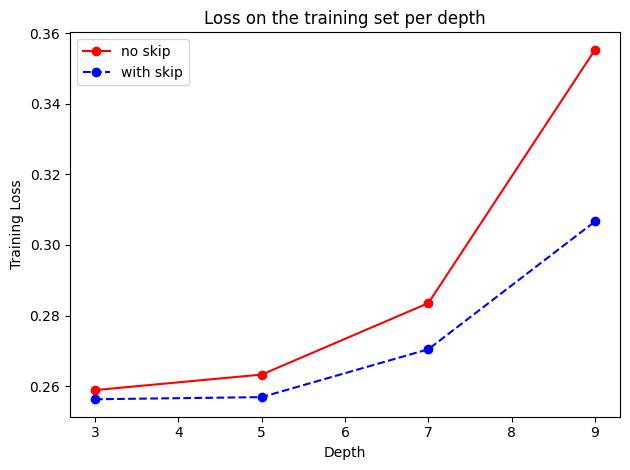

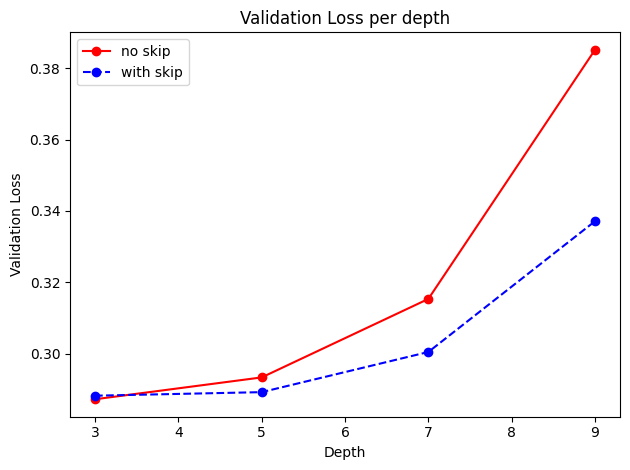

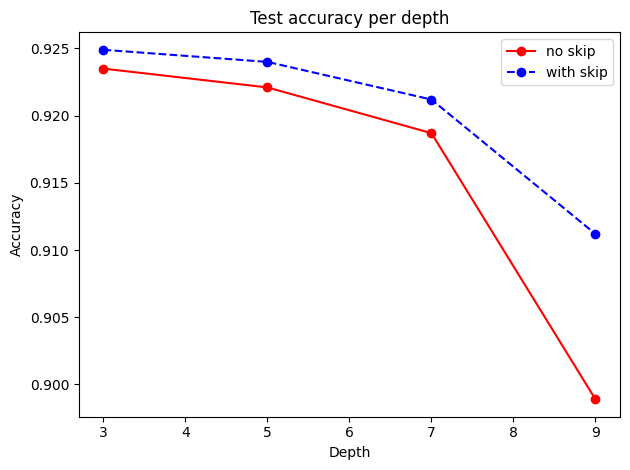

In [16]:
train_losses_no_skip = [x["training loss"] for x in no_skip_summaries]
train_losses_skip = [x["training loss"] for x in skip_summaries]
val_losses_no_skip = [x["validation loss"] for x in no_skip_summaries]
val_losses_skip = [x["validation loss"] for x in skip_summaries]

plt.figure()
plt.plot(depths, train_losses_no_skip, color='red', marker='o', linestyle='-', label='no skip')
plt.plot(depths, train_losses_skip, color='blue', marker='o', linestyle='--', label='with skip')
plt.title("Loss on the training set per depth")
plt.xlabel("Depth")
plt.ylabel("Training Loss")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(depths, val_losses_no_skip, color='red', marker='o', linestyle='-', label='no skip')
plt.plot(depths, val_losses_skip, color='blue', marker='o', linestyle='--', label='with skip')
plt.title("Validation Loss per depth")
plt.xlabel("Depth")
plt.ylabel("Validation Loss")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(depths, no_skip_test_accs, color='red', marker='o', linestyle='-', label='no skip')
plt.plot(depths, skip_test_accs, color='blue', marker='o', linestyle='--', label='with skip')
plt.title("Test accuracy per depth")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


### Exercise 1.3: Rinse and Repeat (but with a CNN)

Repeat the verification you did above, but with **Convolutional** Neural Networks. If you were careful about abstracting your model and training code, this should be a simple exercise. Show that **deeper** CNNs *without* residual connections do not always work better and **even deeper** ones *with* residual connections.

**Hint**: You probably should do this exercise using CIFAR-10, since MNIST is *very* easy (at least up to about 99% accuracy).

**Tip**: Feel free to reuse the ResNet building blocks defined in `torchvision.models.resnet` (e.g. [BasicBlock](https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py#L59) which handles the cascade of 3x3 convolutions, skip connections, and optional downsampling). This is an excellent exercise in code diving. 

**Spoiler**: Depending on the optional exercises you plan to do below, you should think *very* carefully about the architectures of your CNNs here (so you can reuse them!).

In [18]:
# Es 1.3
# Getting CIFAR10
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2023, 0.1994, 0.2010])
])
###data augmentation###
augment = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

ds_train = CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

ds_test = CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

trainer_config = {
    "device": 'cuda', 
    "num_workers": 4, 
    "seed": 10
}

layers =[
    ("Conv2d", 3, 32, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 32),
    ("Conv2d", 32, 64, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 64),
    ("MaxPool2d", 2),  # aggiunto
    ("Dropout", 0.5),
    ("Linear", 1024, 128, 2, 10)
]

layers_medium_net = [
    ("Conv2d", 3, 64, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 64),
    ("Conv2d", 64, 64, 3, 1, 1, "zeros", "ReLU"),
    ("Dropout", 0.5),
    ("BatchNorm2d", 64),
    ("MaxPool2d", 2),

    ("Conv2d", 64, 128, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 128),
    ("Conv2d", 128, 128, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 128),
    ("MaxPool2d", 2),

    ("Conv2d", 128, 256, 3, 1, 1, "zeros", "ReLU"),  # aggiunto blocco
    ("BatchNorm2d", 256),
    ("MaxPool2d", 2),  # aggiunto per ridurre a 4x4

    ("Linear", 4096, 512, 1, 256, "ReLU"),
    ("Dropout", 0.5),
    ("Linear", 256, 128, 2, 10)
]

layers_deeper_net = [
    ("Conv2d", 3, 64, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 64),
    ("Conv2d", 64, 64, 3, 1, 1, "zeros", "ReLU"),
    ("Dropout", 0.5),
    ("BatchNorm2d", 64),
    ("MaxPool2d", 2),

    ("Conv2d", 64, 128, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 128),
    ("Conv2d", 128, 128, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 128),
    ("MaxPool2d", 2),

    ("Conv2d", 128, 256, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 256),
    ("Conv2d", 256, 256, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 256),
    ("MaxPool2d", 2),

    ("Linear", 4096, 512, 1, 256, "ReLU"),
    ("Dropout", 0.5),
    ("Linear", 256, 128, 2, 10)
]



smallRes_net = MyResNet(layers, data_shape=(3,32,32))
mediumRes_net_no_skips = MyResNet(layers_medium_net, data_shape=(3,32,32))
mediumRes_net = MyResNet(layers_medium_net, data_shape=(3,32,32),skip_dict={1:3,1:2,5:6,5:8})
deeperRes_net = MyResNet(layers_deeper_net, data_shape=(3,32,32))
deeperRes_net_skips = MyResNet(layers_deeper_net, data_shape=(3,32,32),skip_dict={1:2,6:8,10:11})

ResNets = [smallRes_net, mediumRes_net_no_skips, mediumRes_net, deeperRes_net, deeperRes_net_skips]
histories = []

In [20]:
best_CNN = None
name_best = None
test_acc = 0
test_acc_list = list()

for i, model in enumerate(ResNets):
 
    project = 'ResNet number' + str(i+1)

    trainer = Trainer(config=trainer_config, model=model,optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4),dataset=ds_train, lr=0.0001)
    trainer.train(data_split=[0.2, 0.8], batch_size=64, num_epochs=100, early_stopping=3, val_check=2, use_wandb=True, project_name=project, augmentation=(0.4,augment), checks=False)

   
    history_cpu = {
        k: [v_i.item() if torch.is_tensor(v_i) else v_i for v_i in v]
        for k, v in trainer.history.items()
    }
    histories.append(history_cpu)
    
    loss,acc = model.test(ds_test)
    test_acc_list.append(acc)
    
    if acc > test_acc :
            best_CNN = model
            test_acc = acc
            name_best = project
    
    

    del model
    del trainer
    gc.collect()
    torch.cuda.empty_cache()


running on device cuda


Training epoch 0: 100%|██████████| 875/875 [00:08<00:00, 97.38it/s] 

Epoch 0/100, Average training loss: 0.5405


Epoch 0/100, Training accuracy: 0.8966


Validation epoch 0: 100%|██████████| 157/157 [00:00<00:00, 262.45it/s]

Epoch 0/100, Average validation loss: 1.0558


Epoch 0/100, Validation accuracy: 0.7101


Training epoch 1: 100%|██████████| 875/875 [00:08<00:00, 97.59it/s]

Epoch 1/100, Average training loss: 0.5092


Epoch 1/100, Training accuracy: 0.9005


Training epoch 2: 100%|██████████| 875/875 [00:08<00:00, 98.87it/s] 

Epoch 2/100, Average training loss: 0.4864


Epoch 2/100, Training accuracy: 0.9168


Validation epoch 2: 100%|██████████| 157/157 [00:00<00:00, 278.59it/s]

Epoch 2/100, Average validation loss: 1.0581


Epoch 2/100, Validation accuracy: 0.7195


Training epoch 3: 100%|██████████| 875/875 [00:08<00:00, 98.38it/s] 

Epoch 3/100, Average training loss: 0.4717


Epoch 3/100, Training accuracy: 0.9220


Training epoch 4: 100%|██████████| 875/875 [00:09<00:00, 96.35it/s]

Epoch 4/100, Average training loss: 0.4443


Epoch 4/100, Training accuracy: 0.9172


Validation epoch 4: 100%|██████████| 157/157 [00:00<00:00, 265.65it/s]

Epoch 4/100, Average validation loss: 1.1424


Epoch 4/100, Validation accuracy: 0.7133


Training epoch 5: 100%|██████████| 875/875 [00:09<00:00, 96.68it/s]

Epoch 5/100, Average training loss: 0.4382


Epoch 5/100, Training accuracy: 0.9286


Training epoch 6: 100%|██████████| 875/875 [00:09<00:00, 96.08it/s]

Epoch 6/100, Average training loss: 0.4214


Epoch 6/100, Training accuracy: 0.9264


Validation epoch 6: 100%|██████████| 157/157 [00:00<00:00, 256.78it/s]

Epoch 6/100, Average validation loss: 1.1678


Epoch 6/100, Validation accuracy: 0.7137
Early stopping triggered!


epoch,▁▂▄▅▇█
loss,█▆▄▃▁▁
training set accuracy,▁▂▅▇▆█
val_loss,▁▁▁▁██
validation set accuracy,▁▁██▃▃
epoch,5
loss,0.43819
training set accuracy,0.92859
val_loss,1.14238
validation set accuracy,0.7133


Test set  loss: 0.9259, accuracy: 0.7159
running on device cuda


Training epoch 0: 100%|██████████| 875/875 [00:10<00:00, 82.80it/s]

Epoch 0/100, Average training loss: 1.2467


Epoch 0/100, Training accuracy: 0.6389


Validation epoch 0: 100%|██████████| 157/157 [00:00<00:00, 178.33it/s]

Epoch 0/100, Average validation loss: 0.9636


Epoch 0/100, Validation accuracy: 0.6326


Training epoch 1: 100%|██████████| 875/875 [00:10<00:00, 82.83it/s]

Epoch 1/100, Average training loss: 0.7378


Epoch 1/100, Training accuracy: 0.7744


Training epoch 2: 100%|██████████| 875/875 [00:10<00:00, 82.78it/s]

Epoch 2/100, Average training loss: 0.5132


Epoch 2/100, Training accuracy: 0.8323


Validation epoch 2: 100%|██████████| 157/157 [00:00<00:00, 180.60it/s]

Epoch 2/100, Average validation loss: 0.7352


Epoch 2/100, Validation accuracy: 0.7505


Training epoch 3: 100%|██████████| 875/875 [00:10<00:00, 83.16it/s]

Epoch 3/100, Average training loss: 0.3742


Epoch 3/100, Training accuracy: 0.9034


Training epoch 4: 100%|██████████| 875/875 [00:10<00:00, 82.81it/s]

Epoch 4/100, Average training loss: 0.2832


Epoch 4/100, Training accuracy: 0.9126


Validation epoch 4: 100%|██████████| 157/157 [00:00<00:00, 184.91it/s]

Epoch 4/100, Average validation loss: 0.7335


Epoch 4/100, Validation accuracy: 0.7652


Training epoch 5: 100%|██████████| 875/875 [00:10<00:00, 83.19it/s]

Epoch 5/100, Average training loss: 0.2163


Epoch 5/100, Training accuracy: 0.9318


Training epoch 6: 100%|██████████| 875/875 [00:10<00:00, 83.35it/s]

Epoch 6/100, Average training loss: 0.1777


Epoch 6/100, Training accuracy: 0.9405


Validation epoch 6: 100%|██████████| 157/157 [00:00<00:00, 178.32it/s]

Epoch 6/100, Average validation loss: 0.7631


Epoch 6/100, Validation accuracy: 0.7723


Training epoch 7: 100%|██████████| 875/875 [00:10<00:00, 83.13it/s]

Epoch 7/100, Average training loss: 0.1571


Epoch 7/100, Training accuracy: 0.9371


Training epoch 8: 100%|██████████| 875/875 [00:10<00:00, 82.07it/s]

Epoch 8/100, Average training loss: 0.1436


Epoch 8/100, Training accuracy: 0.9486


Validation epoch 8: 100%|██████████| 157/157 [00:00<00:00, 181.27it/s]

Epoch 8/100, Average validation loss: 0.8545


Epoch 8/100, Validation accuracy: 0.7836
Early stopping triggered!


epoch,▁▂▃▄▅▆▇█
loss,█▅▃▂▂▁▁▁
training set accuracy,▁▄▅▇▇███
val_loss,██▁▁▁▁▂▂
validation set accuracy,▁▁▇▇████
epoch,7
loss,0.15705
training set accuracy,0.93707
val_loss,0.76312
validation set accuracy,0.7723


Test set  loss: 0.9528, accuracy: 0.7793
running on device cuda


Training epoch 0: 100%|██████████| 875/875 [00:11<00:00, 73.91it/s]

Epoch 0/100, Average training loss: 1.2218


Epoch 0/100, Training accuracy: 0.6723


Validation epoch 0: 100%|██████████| 157/157 [00:00<00:00, 161.41it/s]

Epoch 0/100, Average validation loss: 0.9261


Epoch 0/100, Validation accuracy: 0.6535


Training epoch 1: 100%|██████████| 875/875 [00:11<00:00, 74.84it/s]

Epoch 1/100, Average training loss: 0.7348


Epoch 1/100, Training accuracy: 0.8026


Training epoch 2: 100%|██████████| 875/875 [00:11<00:00, 73.97it/s]

Epoch 2/100, Average training loss: 0.5293


Epoch 2/100, Training accuracy: 0.8243


Validation epoch 2: 100%|██████████| 157/157 [00:00<00:00, 161.91it/s]

Epoch 2/100, Average validation loss: 0.7368


Epoch 2/100, Validation accuracy: 0.7407


Training epoch 3: 100%|██████████| 875/875 [00:12<00:00, 72.79it/s]

Epoch 3/100, Average training loss: 0.3958


Epoch 3/100, Training accuracy: 0.8778


Training epoch 4: 100%|██████████| 875/875 [00:11<00:00, 73.14it/s]

Epoch 4/100, Average training loss: 0.2942


Epoch 4/100, Training accuracy: 0.9227


Validation epoch 4: 100%|██████████| 157/157 [00:00<00:00, 160.48it/s]

Epoch 4/100, Average validation loss: 0.7336


Epoch 4/100, Validation accuracy: 0.7896


Training epoch 5: 100%|██████████| 875/875 [00:11<00:00, 73.90it/s]

Epoch 5/100, Average training loss: 0.2356


Epoch 5/100, Training accuracy: 0.9314


Training epoch 6: 100%|██████████| 875/875 [00:11<00:00, 73.96it/s]

Epoch 6/100, Average training loss: 0.1930


Epoch 6/100, Training accuracy: 0.9374


Validation epoch 6: 100%|██████████| 157/157 [00:00<00:00, 164.07it/s]

Epoch 6/100, Average validation loss: 0.8139


Epoch 6/100, Validation accuracy: 0.7850


Training epoch 7: 100%|██████████| 875/875 [00:11<00:00, 74.32it/s]

Epoch 7/100, Average training loss: 0.1706


Epoch 7/100, Training accuracy: 0.9616


Training epoch 8: 100%|██████████| 875/875 [00:11<00:00, 73.62it/s]

Epoch 8/100, Average training loss: 0.1443


Epoch 8/100, Training accuracy: 0.9359


Validation epoch 8: 100%|██████████| 157/157 [00:00<00:00, 161.73it/s]

Epoch 8/100, Average validation loss: 0.8087


Epoch 8/100, Validation accuracy: 0.7756


Training epoch 9: 100%|██████████| 875/875 [00:12<00:00, 70.56it/s]

Epoch 9/100, Average training loss: 0.1360


Epoch 9/100, Training accuracy: 0.9441


Training epoch 10: 100%|██████████| 875/875 [00:12<00:00, 69.71it/s]

Epoch 10/100, Average training loss: 0.1211


Epoch 10/100, Training accuracy: 0.9297


Validation epoch 10: 100%|██████████| 157/157 [00:00<00:00, 158.78it/s]

Epoch 10/100, Average validation loss: 0.8641


Epoch 10/100, Validation accuracy: 0.7723
Early stopping triggered!


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▂▁▁▁▁
training set accuracy,▁▄▅▆▇▇▇█▇█
val_loss,██▁▁▁▁▄▄▄▄
validation set accuracy,▁▁▅▅████▇▇
epoch,9
loss,0.13596
training set accuracy,0.94409
val_loss,0.80866
validation set accuracy,0.7756


Test set  loss: 0.9770, accuracy: 0.7727
running on device cuda


Training epoch 0: 100%|██████████| 875/875 [00:13<00:00, 65.95it/s]

Epoch 0/100, Average training loss: 1.2938


Epoch 0/100, Training accuracy: 0.6615


Validation epoch 0: 100%|██████████| 157/157 [00:00<00:00, 157.85it/s]

Epoch 0/100, Average validation loss: 0.9690


Epoch 0/100, Validation accuracy: 0.6480


Training epoch 1: 100%|██████████| 875/875 [00:13<00:00, 62.63it/s]

Epoch 1/100, Average training loss: 0.8016


Epoch 1/100, Training accuracy: 0.7401


Training epoch 2: 100%|██████████| 875/875 [00:13<00:00, 64.28it/s]

Epoch 2/100, Average training loss: 0.5910


Epoch 2/100, Training accuracy: 0.8180


Validation epoch 2: 100%|██████████| 157/157 [00:01<00:00, 155.91it/s]

Epoch 2/100, Average validation loss: 0.6955


Epoch 2/100, Validation accuracy: 0.7552


Training epoch 3: 100%|██████████| 875/875 [00:13<00:00, 64.52it/s]

Epoch 3/100, Average training loss: 0.4485


Epoch 3/100, Training accuracy: 0.8836


Training epoch 4: 100%|██████████| 875/875 [00:14<00:00, 58.71it/s]

Epoch 4/100, Average training loss: 0.3436


Epoch 4/100, Training accuracy: 0.8817


Validation epoch 4: 100%|██████████| 157/157 [00:01<00:00, 137.27it/s]

Epoch 4/100, Average validation loss: 0.6529


Epoch 4/100, Validation accuracy: 0.7743


Training epoch 5: 100%|██████████| 875/875 [00:14<00:00, 59.79it/s]

Epoch 5/100, Average training loss: 0.2670


Epoch 5/100, Training accuracy: 0.9231


Training epoch 6: 100%|██████████| 875/875 [00:14<00:00, 60.79it/s]

Epoch 6/100, Average training loss: 0.2181


Epoch 6/100, Training accuracy: 0.9117


Validation epoch 6: 100%|██████████| 157/157 [00:01<00:00, 144.85it/s]

Epoch 6/100, Average validation loss: 0.6968


Epoch 6/100, Validation accuracy: 0.7750


Training epoch 7: 100%|██████████| 875/875 [00:14<00:00, 62.08it/s]

Epoch 7/100, Average training loss: 0.1903


Epoch 7/100, Training accuracy: 0.9376


Training epoch 8: 100%|██████████| 875/875 [00:12<00:00, 70.32it/s]

Epoch 8/100, Average training loss: 0.1594


Epoch 8/100, Training accuracy: 0.9373


Validation epoch 8: 100%|██████████| 157/157 [00:00<00:00, 157.57it/s]

Epoch 8/100, Average validation loss: 0.8320


Epoch 8/100, Validation accuracy: 0.8063
Early stopping triggered!


epoch,▁▂▃▄▅▆▇█
loss,█▅▄▃▂▁▁▁
training set accuracy,▁▃▅▇▇█▇█
val_loss,██▂▂▁▁▂▂
validation set accuracy,▁▁▇▇████
epoch,7
loss,0.19034
training set accuracy,0.93757
val_loss,0.69683
validation set accuracy,0.775


Test set  loss: 0.8489, accuracy: 0.7991
running on device cuda


Training epoch 0: 100%|██████████| 875/875 [00:13<00:00, 63.13it/s]

Epoch 0/100, Average training loss: 1.3078


Epoch 0/100, Training accuracy: 0.6704


Validation epoch 0: 100%|██████████| 157/157 [00:01<00:00, 145.45it/s]

Epoch 0/100, Average validation loss: 0.9537


Epoch 0/100, Validation accuracy: 0.6524


Training epoch 1: 100%|██████████| 875/875 [00:13<00:00, 64.23it/s]

Epoch 1/100, Average training loss: 0.7803


Epoch 1/100, Training accuracy: 0.7914


Training epoch 2: 100%|██████████| 875/875 [00:13<00:00, 63.63it/s]

Epoch 2/100, Average training loss: 0.5546


Epoch 2/100, Training accuracy: 0.8234


Validation epoch 2: 100%|██████████| 157/157 [00:01<00:00, 150.17it/s]

Epoch 2/100, Average validation loss: 0.6853


Epoch 2/100, Validation accuracy: 0.7708


Training epoch 3: 100%|██████████| 875/875 [00:13<00:00, 63.93it/s]

Epoch 3/100, Average training loss: 0.4179


Epoch 3/100, Training accuracy: 0.8659


Training epoch 4: 100%|██████████| 875/875 [00:13<00:00, 63.59it/s]

Epoch 4/100, Average training loss: 0.3218


Epoch 4/100, Training accuracy: 0.9120


Validation epoch 4: 100%|██████████| 157/157 [00:01<00:00, 156.40it/s]

Epoch 4/100, Average validation loss: 0.6518


Epoch 4/100, Validation accuracy: 0.8010


Training epoch 5: 100%|██████████| 875/875 [00:13<00:00, 64.19it/s]

Epoch 5/100, Average training loss: 0.2522


Epoch 5/100, Training accuracy: 0.9318


Training epoch 6: 100%|██████████| 875/875 [00:13<00:00, 64.28it/s]

Epoch 6/100, Average training loss: 0.2023


Epoch 6/100, Training accuracy: 0.9378


Validation epoch 6: 100%|██████████| 157/157 [00:01<00:00, 148.27it/s]

Epoch 6/100, Average validation loss: 0.6791


Epoch 6/100, Validation accuracy: 0.7884


Training epoch 7: 100%|██████████| 875/875 [00:13<00:00, 64.65it/s]

Epoch 7/100, Average training loss: 0.1754


Epoch 7/100, Training accuracy: 0.9327


Training epoch 8: 100%|██████████| 875/875 [00:13<00:00, 63.15it/s]

Epoch 8/100, Average training loss: 0.1581


Epoch 8/100, Training accuracy: 0.9350


Validation epoch 8: 100%|██████████| 157/157 [00:01<00:00, 142.74it/s]

Epoch 8/100, Average validation loss: 0.6986


Epoch 8/100, Validation accuracy: 0.7883
Early stopping triggered!


epoch,▁▂▃▄▅▆▇█
loss,█▅▃▂▂▁▁▁
training set accuracy,▁▄▅▆▇███
val_loss,██▂▂▁▁▂▂
validation set accuracy,▁▁▇▇██▇▇
epoch,7
loss,0.17541
training set accuracy,0.9327
val_loss,0.67911
validation set accuracy,0.7884


Test set  loss: 0.7925, accuracy: 0.7847


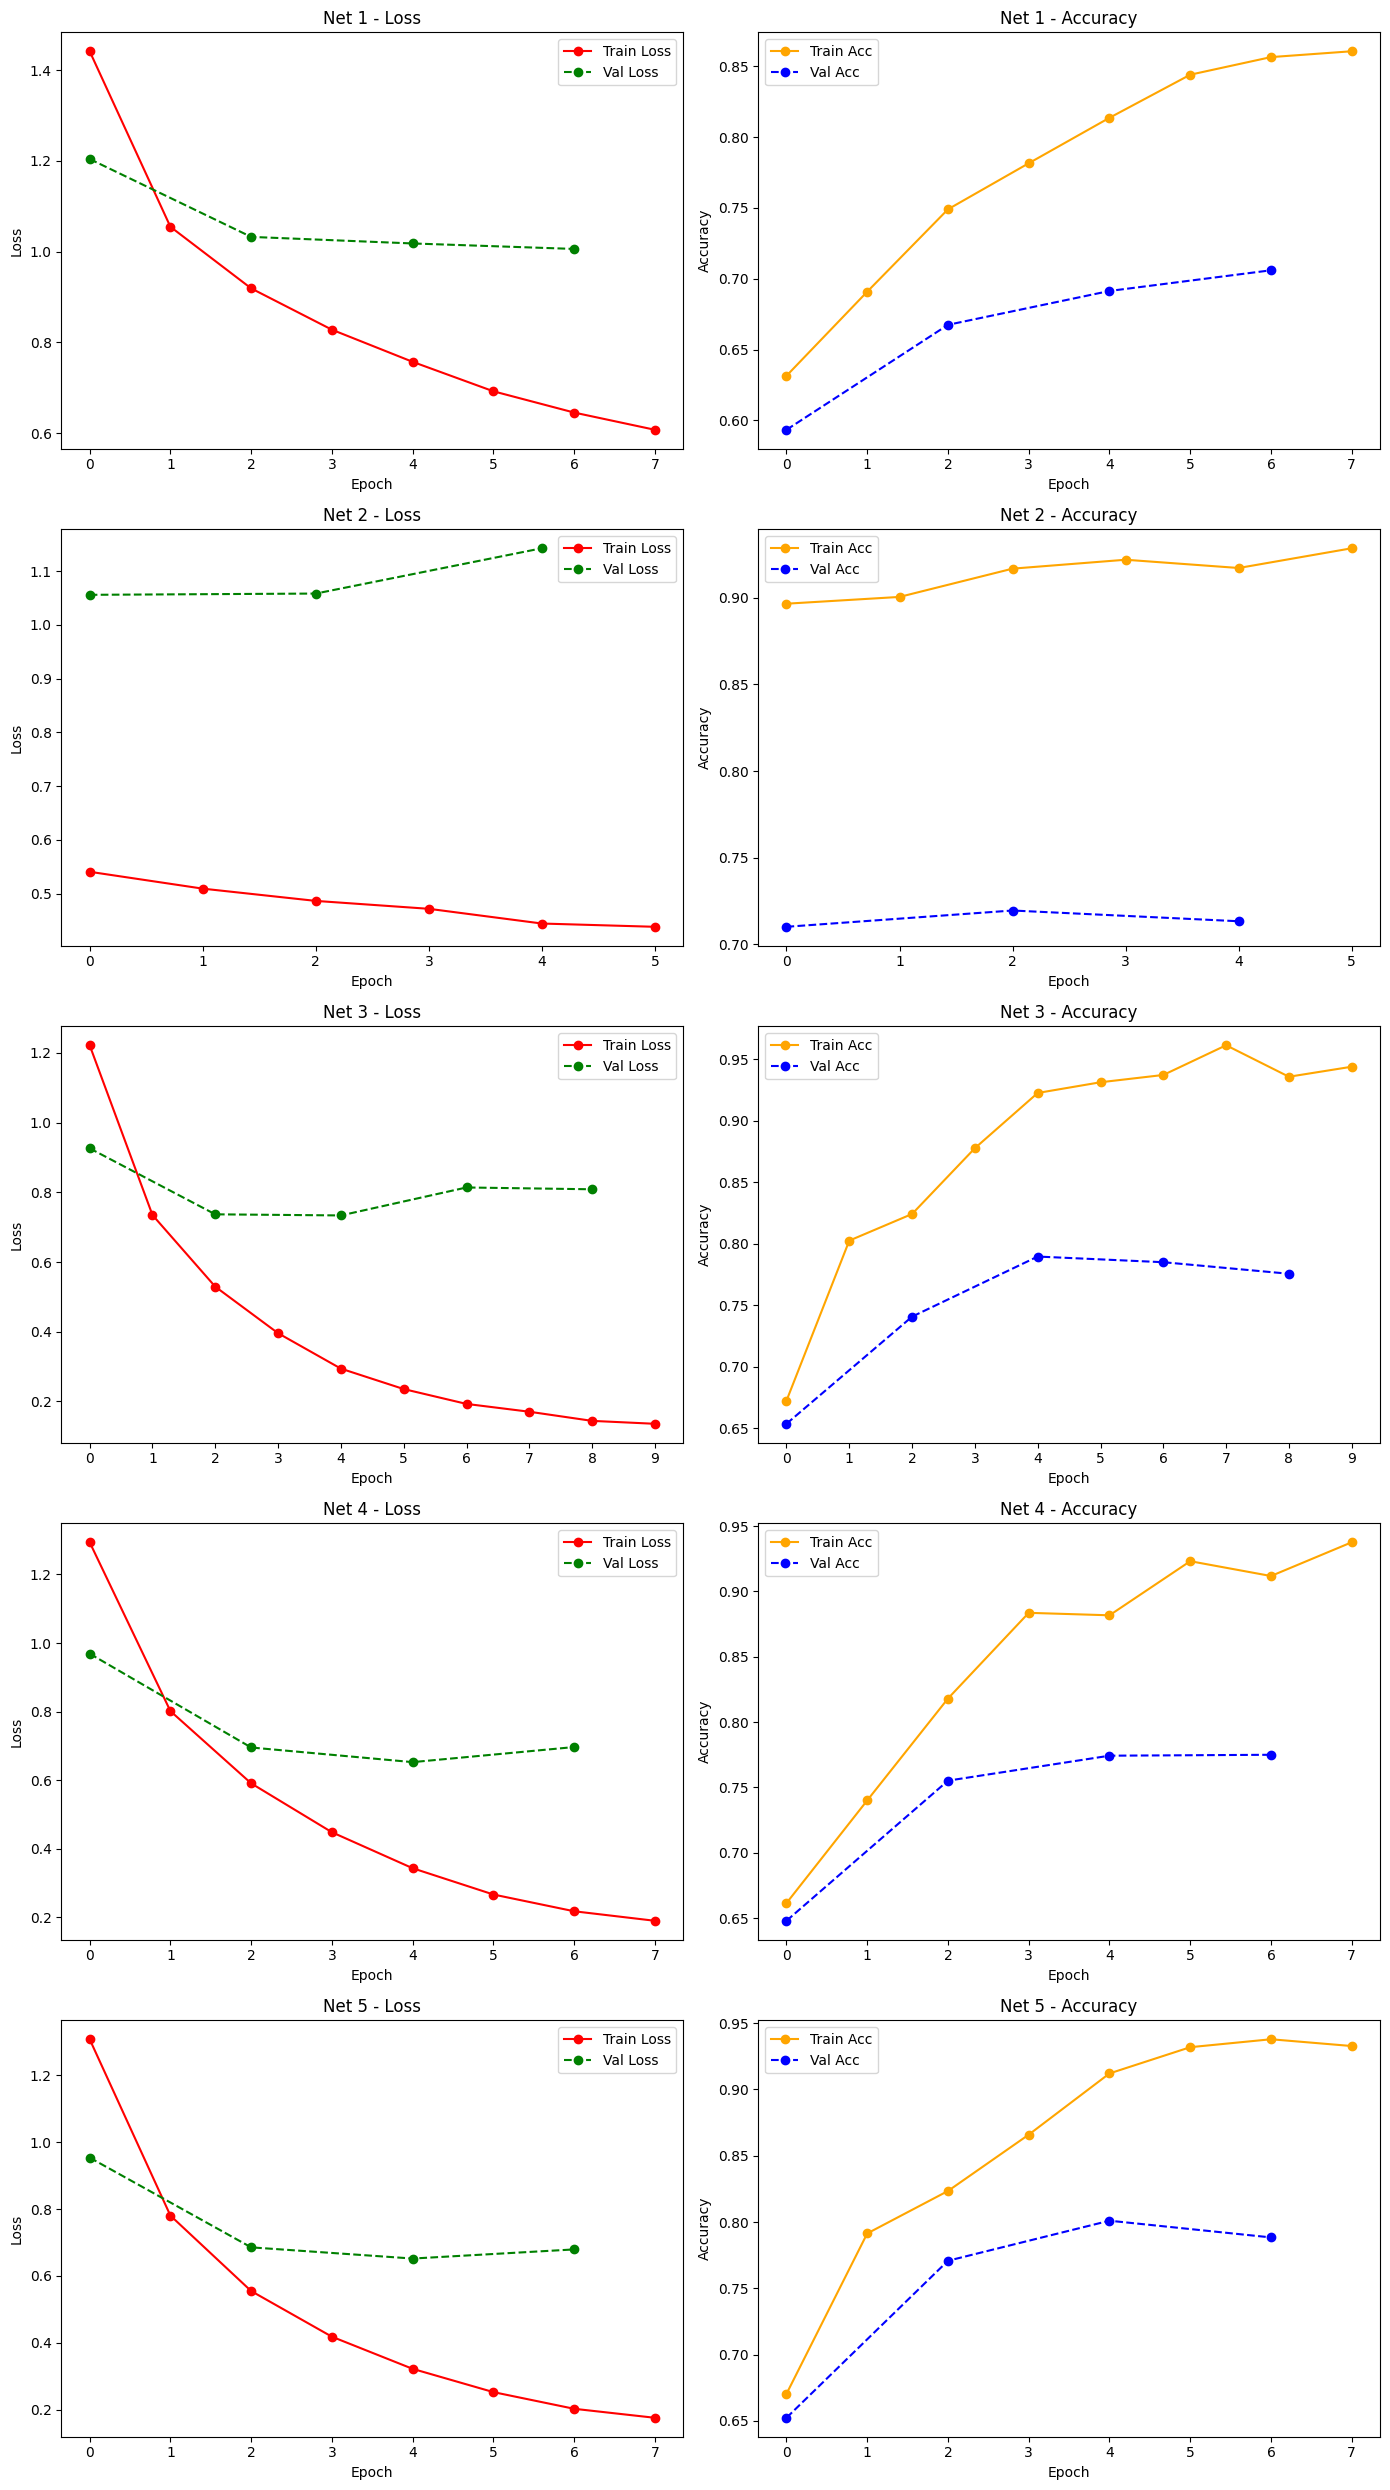

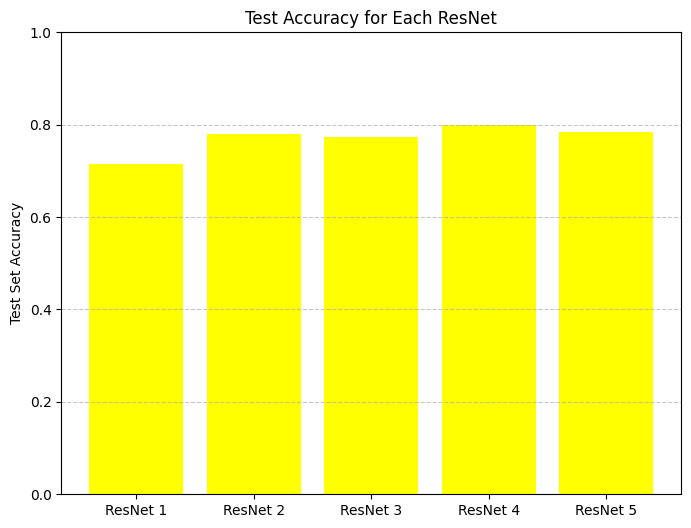

In [31]:
n_models = len(ResNets)
val_check = 2  

fig, axs = plt.subplots(n_models, 2, figsize=(14, 5 * n_models))

if n_models == 1:
    axs = [axs]

for i, history in enumerate(histories):
    epochs_train = list(range(len(history['train_loss'])))
    epochs_val = [e for e in epochs_train if (e + 2) % val_check == 0]

    val_loss = history['val_loss'][:len(epochs_val)]
    val_acc = history['val_acc'][:len(epochs_val)]

    
    axs[i][0].plot(
        epochs_train, history['train_loss'],
        color="red", marker="o", linestyle='-', label='Train Loss'
    )
    axs[i][0].plot(
        epochs_val, val_loss,
        color="green", marker="o", linestyle='--', label='Val Loss'
    )
    axs[i][0].set_xlabel('Epoch')
    axs[i][0].set_ylabel('Loss')
    axs[i][0].set_title(f'Net {i+1} - Loss')
    axs[i][0].legend()
    axs[i][0].set_xticks(epochs_train)

    
    axs[i][1].plot(
        epochs_train, history['train_acc'],
        color="orange", marker="o", linestyle='-', label='Train Acc'
    )
    axs[i][1].plot(
        epochs_val, val_acc,
        color="blue", marker="o", linestyle='--', label='Val Acc'
    )
    axs[i][1].set_xlabel('Epoch')
    axs[i][1].set_ylabel('Accuracy')
    axs[i][1].set_title(f'Net {i+1} - Accuracy')
    axs[i][1].legend()
    axs[i][1].set_xticks(epochs_train)

plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 6))
model_labels = [f'ResNet {i+1}' for i in range(len(ResNets))]
plt.bar(model_labels, test_acc_list, color='yellow')
plt.ylabel('Test Set Accuracy')
plt.title('Test Accuracy for Each ResNet')
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


-----
## Exercise 2: Choose at Least One

Below are **three** exercises that ask you to deepen your understanding of Deep Networks for visual recognition. You must choose **at least one** of the below for your final submission -- feel free to do **more**, but at least **ONE** you must submit. Each exercise is designed to require you to dig your hands **deep** into the guts of your models in order to do new and interesting things.

**Note**: These exercises are designed to use your small, custom CNNs and small datasets. This is to keep training times reasonable. If you have a decent GPU, feel free to use pretrained ResNets and larger datasets (e.g. the [Imagenette](https://pytorch.org/vision/0.20/generated/torchvision.datasets.Imagenette.html#torchvision.datasets.Imagenette) dataset at 160px).

### Exercise 2.1: *Fine-tune* a pre-trained model
Train one of your residual CNN models from Exercise 1.3 on CIFAR-10. Then:
1. Use the pre-trained model as a **feature extractor** (i.e. to extract the feature activations of the layer input into the classifier) on CIFAR-100. Use a **classical** approach (e.g. Linear SVM, K-Nearest Neighbor, or Bayesian Generative Classifier) from scikit-learn to establish a **stable baseline** performance on CIFAR-100 using the features extracted using your CNN.
2. Fine-tune your CNN on the CIFAR-100 training set and compare with your stable baseline. Experiment with different strategies:
    - Unfreeze some of the earlier layers for fine-tuning.
    - Test different optimizers (Adam, SGD, etc.).

Each of these steps will require you to modify your model definition in some way. For 1, you will need to return the activations of the last fully-connected layer (or the global average pooling layer). For 2, you will need to replace the original, 10-class classifier with a new, randomly-initialized 100-class classifier.

In [3]:

layers_deeper_net = [
    ("Conv2d", 3, 64, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 64),
    ("Conv2d", 64, 64, 3, 1, 1, "zeros", "ReLU"),
    ("Dropout", 0.5),
    ("BatchNorm2d", 64),
    ("MaxPool2d", 2),

    ("Conv2d", 64, 128, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 128),
    ("Conv2d", 128, 128, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 128),
    ("MaxPool2d", 2),

    ("Conv2d", 128, 256, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 256),
    ("Conv2d", 256, 256, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 256),
    ("MaxPool2d", 2),

    ("Linear", 4096, 512, 1, 256, "ReLU"),
    ("Dropout", 0.5),
    ("Linear", 256, 128, 2, 10)
]

best_CNN = MyResNet(layers_deeper_net, data_shape=(3,32,32),skip_dict={1:2,6:8,10:11})

In [4]:
best_CNN.load_state_dict(torch.load('/home/tommaso/Documents/deep_learning/lab1/bestCNN.pt'))
best_CNN_beheaded = best_CNN.get_submodel(24)
best_CNN_beheaded.layers

ModuleList(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU()
  (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU()
  (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (16)

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4865, 0.4409), (0.2673, 0.2564, 0.2762))  # CIFAR-100 mean/std
])

augment= transforms.Compose([
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=10),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2, hue=0.05),
    transforms.ToTensor(),
    transforms.GaussianBlur(3, sigma=(0.1, 2.0)),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.2), ratio=(0.3, 3.3)),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010)),
])


# Dataset train e test
ds_train = CIFAR100(
    root='./data', train=True, download=True, transform=transform
)

ds_test = CIFAR100(
    root='./data', train=False, download=True, transform=transform
)

In [6]:
#####getting data for training the baseline######

batch_size = 64
device = 'cuda'

loader = DataLoader(
        ds_train,
        shuffle=True,
        batch_size=batch_size,
        num_workers=4
        )

seed = 42

random.seed(seed)                     
np.random.seed(seed)                  
torch.manual_seed(seed)               
torch.cuda.manual_seed(seed)          
torch.cuda.manual_seed_all(seed) 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
best_CNN_beheaded.device = device
best_CNN.device = device
best_CNN_beheaded = best_CNN_beheaded.to(device)
best_CNN = best_CNN.to(device)

In [7]:
out_dim = 512

Y_train = np.zeros(len(ds_train))
X_train = np.zeros([len(ds_train), out_dim]) #512 dimension of flattened CNN output
n_batch = 0
j = 0
for x,y in loader:
    
    tail = int(y.shape[0])
    Y_train[j:j+tail] = y.numpy()
    
    x = x.to(device)
    with torch.no_grad():
        out = best_CNN_beheaded(x)
    
    j = n_batch*batch_size
    for i in range(list(out.shape)[0]):
       
        image = out[i]

        features = image.view(-1).cpu().numpy()
        index = j+i

        X_train[index,:] = features  
    n_batch += 1  

In [8]:
loader = DataLoader(
        ds_test,
        shuffle=True,
        batch_size=batch_size,
        num_workers=4
        )
Y_test = np.zeros(len(ds_test))
X_test = np.zeros([len(ds_test), out_dim])
n_batch = 0
j = 0
for x,y in loader:
    
    tail = int(y.shape[0])
    Y_test[j:j+tail] = y.numpy()
    
    x = x.to(device)
    with torch.no_grad():
        out = best_CNN_beheaded(x)
    
    j = n_batch*batch_size
    for i in range(list(out.shape)[0]):
       
        image = out[i]
        features = image.view(-1).cpu().numpy()
        index = j+i

        X_test[index,:] = features  
    n_batch += 1  

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=80, n_jobs=-1)
knn.fit(X_train_scaled, Y_train)

Y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(Y_test, Y_pred)*100,'%')
print("\nClassification report:")
print(classification_report(Y_test, Y_pred, digits=3))

Accuracy: 1.0 %

Classification report:
              precision    recall  f1-score   support

         0.0      0.021     0.031     0.025       163
         1.0      0.008     0.020     0.011       100
         2.0      0.012     0.031     0.018        98
         3.0      0.016     0.030     0.021        99
         4.0      0.005     0.010     0.007        99
         5.0      0.014     0.020     0.017       100
         6.0      0.025     0.050     0.033       100
         7.0      0.000     0.000     0.000       100
         8.0      0.006     0.010     0.007        99
         9.0      0.011     0.020     0.014        99
        10.0      0.011     0.020     0.014        99
        11.0      0.021     0.060     0.031       100
        12.0      0.012     0.020     0.015        99
        13.0      0.000     0.000     0.000        99
        14.0      0.012     0.020     0.015       100
        15.0      0.014     0.030     0.019        99
        16.0      0.010     0.010     0.0

In [15]:
####build the classifier head###

classifier_layers = [
    ("Linear", 4096, 1024, 2, 512,'ReLU'),  
    ("Dropout", 0.8, "ReLU"),
    ("Linear", 512, 128, 2, 100, None)              
] 
best_CNN.load_state_dict(torch.load('/home/tommaso/Documents/deep_learning/lab1/bestCNN.pt', weights_only = True)) 
best_CNN_beheaded = best_CNN.get_submodel(22)
best_CNN_beheaded.skips={1:2,6:8,10:11}


best_CNN_beheaded.layers.append(MyResNet(classifier_layers))

best_CNN_beheaded.device = 'cuda'
best_CNN_beheaded = best_CNN_beheaded.to(device)


ResNet_CIFAR100 = best_CNN_beheaded

In [16]:
from torch.optim import SGD, Adam

trainer_config = {
    "device": 'cuda', 
    "num_workers": 4, 
    "seed": 10
}



model = ResNet_CIFAR100 

# === Step 1: fine-tuning solo sui layer lineari ===
optimizer1 = SGD(model.parameters(), momentum=0.9, weight_decay=1e-4)
trainer = Trainer(config=trainer_config,lr=0.01, model=model, optimizer=optimizer1, dataset=ds_train)

trainer.fine_tune(
    layers_to_unfreeze=[22, 24, 27, 30, 31],
    data_split=[0.3, 0.7],
    batch_size=128,
    num_epochs=7,
    early_stopping=3,
    val_check=2,
    augmentation=[0.3,augment],
    use_wandb=False,
    checks=False
)

# === Step 2: fine-tuning su alcuni layer convoluzionali ===
optimizer2 = SGD(model.parameters(), momentum=0.9, weight_decay=1e-4)
trainer = Trainer(config=trainer_config,lr=0.001, model=model, optimizer=optimizer2, dataset=ds_train)

trainer.fine_tune(
    layers_to_unfreeze=[11, 15, 18],
    data_split=[0.3, 0.7],
    batch_size=128,
    num_epochs=10,
    early_stopping=3,
    val_check=1,
    augmentation=[0.3,augment],
    use_wandb=False,
    checks=False
)

# === Step 3: fine-tuning di tutta la rete con ADAM + scheduler ===
optimizer3 = Adam(model.parameters(), weight_decay=1e-4)


trainer = Trainer(config=trainer_config, model=model, lr=7e-5,optimizer=optimizer3, dataset=ds_train)

trainer.fine_tune(
    layers_to_unfreeze=list(range(0, 32)),
    data_split=[0.3, 0.7],
    batch_size=128,
    num_epochs=10,
    early_stopping=2,
    val_check=1,
    augmentation=[0.3,augment],
    use_wandb=False,
    checks=False
)


running on device cuda
[Fine-tune] Unfreezing layer indices: [22, 24, 27, 30, 31]


Training epoch 0: 100%|██████████| 356/356 [00:28<00:00, 12.47it/s]

Epoch 0/7, Average training loss: 4.6060


Epoch 0/7, Training accuracy: 0.0104


Validation epoch 0: 100%|██████████| 118/118 [00:05<00:00, 20.03it/s]


Epoch 0/7, Average validation loss: 4.6056
Epoch 0/7, Validation accuracy: 0.0097


Training epoch 1: 100%|██████████| 356/356 [00:28<00:00, 12.44it/s]

Epoch 1/7, Average training loss: 4.6036


Epoch 1/7, Training accuracy: 0.0114


Training epoch 2: 100%|██████████| 356/356 [00:28<00:00, 12.38it/s]

Epoch 2/7, Average training loss: 4.6008


Epoch 2/7, Training accuracy: 0.0136


Validation epoch 2: 100%|██████████| 118/118 [00:05<00:00, 19.72it/s]

Epoch 2/7, Average validation loss: 4.6006


Epoch 2/7, Validation accuracy: 0.0125


Training epoch 3: 100%|██████████| 356/356 [00:29<00:00, 12.11it/s]

Epoch 3/7, Average training loss: 4.5970


Epoch 3/7, Training accuracy: 0.0197


Training epoch 4: 100%|██████████| 356/356 [00:29<00:00, 11.92it/s]

Epoch 4/7, Average training loss: 4.5903


Epoch 4/7, Training accuracy: 0.0213


Validation epoch 4: 100%|██████████| 118/118 [00:06<00:00, 19.20it/s]

Epoch 4/7, Average validation loss: 4.5882


Epoch 4/7, Validation accuracy: 0.0201


Training epoch 5: 100%|██████████| 356/356 [00:30<00:00, 11.67it/s]

Epoch 5/7, Average training loss: 4.5768


Epoch 5/7, Training accuracy: 0.0223


Training epoch 6: 100%|██████████| 356/356 [00:30<00:00, 11.50it/s]

Epoch 6/7, Average training loss: 4.5428


Epoch 6/7, Training accuracy: 0.0378


Validation epoch 6: 100%|██████████| 118/118 [00:06<00:00, 18.84it/s]

Epoch 6/7, Average validation loss: 4.5182


Epoch 6/7, Validation accuracy: 0.0351
running on device cuda
[Fine-tune] Unfreezing layer indices: [11, 15, 18]


Training epoch 0: 100%|██████████| 356/356 [00:33<00:00, 10.72it/s]

Epoch 0/10, Average training loss: 4.5094


Epoch 0/10, Training accuracy: 0.0390


Validation epoch 0: 100%|██████████| 118/118 [00:06<00:00, 18.75it/s]

Epoch 0/10, Average validation loss: 4.5171


Epoch 0/10, Validation accuracy: 0.0363


Training epoch 1: 100%|██████████| 356/356 [00:32<00:00, 11.01it/s]

Epoch 1/10, Average training loss: 4.5094


Epoch 1/10, Training accuracy: 0.0386


Validation epoch 1: 100%|██████████| 118/118 [00:05<00:00, 19.78it/s]

Epoch 1/10, Average validation loss: 4.5171


Epoch 1/10, Validation accuracy: 0.0359


Training epoch 2: 100%|██████████| 356/356 [00:30<00:00, 11.87it/s]

Epoch 2/10, Average training loss: 4.5100


Epoch 2/10, Training accuracy: 0.0385


Validation epoch 2: 100%|██████████| 118/118 [00:05<00:00, 20.03it/s]

Epoch 2/10, Average validation loss: 4.5161


Epoch 2/10, Validation accuracy: 0.0364


Training epoch 3: 100%|██████████| 356/356 [00:29<00:00, 12.10it/s]

Epoch 3/10, Average training loss: 4.5080


Epoch 3/10, Training accuracy: 0.0395


Validation epoch 3: 100%|██████████| 118/118 [00:05<00:00, 19.92it/s]

Epoch 3/10, Average validation loss: 4.5160


Epoch 3/10, Validation accuracy: 0.0366


Training epoch 4: 100%|██████████| 356/356 [00:29<00:00, 12.21it/s]

Epoch 4/10, Average training loss: 4.5075


Epoch 4/10, Training accuracy: 0.0388


Validation epoch 4: 100%|██████████| 118/118 [00:05<00:00, 19.86it/s]

Epoch 4/10, Average validation loss: 4.5155


Epoch 4/10, Validation accuracy: 0.0368


Training epoch 5: 100%|██████████| 356/356 [00:29<00:00, 12.19it/s]

Epoch 5/10, Average training loss: 4.5073


Epoch 5/10, Training accuracy: 0.0399


Validation epoch 5: 100%|██████████| 118/118 [00:05<00:00, 20.05it/s]

Epoch 5/10, Average validation loss: 4.5138


Epoch 5/10, Validation accuracy: 0.0367


Training epoch 6: 100%|██████████| 356/356 [00:29<00:00, 12.22it/s]

Epoch 6/10, Average training loss: 4.5075


Epoch 6/10, Training accuracy: 0.0393


Validation epoch 6: 100%|██████████| 118/118 [00:05<00:00, 20.10it/s]

Epoch 6/10, Average validation loss: 4.5151


Epoch 6/10, Validation accuracy: 0.0363


Training epoch 7: 100%|██████████| 356/356 [00:29<00:00, 12.24it/s]

Epoch 7/10, Average training loss: 4.5068


Epoch 7/10, Training accuracy: 0.0389


Validation epoch 7: 100%|██████████| 118/118 [00:05<00:00, 19.78it/s]

Epoch 7/10, Average validation loss: 4.5132


Epoch 7/10, Validation accuracy: 0.0359


Training epoch 8: 100%|██████████| 356/356 [00:29<00:00, 12.09it/s]

Epoch 8/10, Average training loss: 4.5047


Epoch 8/10, Training accuracy: 0.0392


Validation epoch 8: 100%|██████████| 118/118 [00:05<00:00, 19.78it/s]

Epoch 8/10, Average validation loss: 4.5126


Epoch 8/10, Validation accuracy: 0.0369


Training epoch 9: 100%|██████████| 356/356 [00:30<00:00, 11.85it/s]

Epoch 9/10, Average training loss: 4.5046


Epoch 9/10, Training accuracy: 0.0394


Validation epoch 9: 100%|██████████| 118/118 [00:06<00:00, 19.66it/s]

Epoch 9/10, Average validation loss: 4.5115


Epoch 9/10, Validation accuracy: 0.0365
running on device cuda
[Fine-tune] Unfreezing layer indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


Training epoch 0: 100%|██████████| 356/356 [00:50<00:00,  7.00it/s]

Epoch 0/10, Average training loss: 3.2563


Epoch 0/10, Training accuracy: 0.3142


Validation epoch 0: 100%|██████████| 118/118 [00:05<00:00, 20.00it/s]

Epoch 0/10, Average validation loss: 2.8796


Epoch 0/10, Validation accuracy: 0.2582


Training epoch 1: 100%|██████████| 356/356 [00:50<00:00,  7.11it/s]

Epoch 1/10, Average training loss: 2.2858


Epoch 1/10, Training accuracy: 0.5055


Validation epoch 1: 100%|██████████| 118/118 [00:05<00:00, 19.75it/s]

Epoch 1/10, Average validation loss: 2.6316


Epoch 1/10, Validation accuracy: 0.3571


Training epoch 2: 100%|██████████| 356/356 [00:49<00:00,  7.15it/s]

Epoch 2/10, Average training loss: 1.6980


Epoch 2/10, Training accuracy: 0.6100


Validation epoch 2: 100%|██████████| 118/118 [00:05<00:00, 19.93it/s]

Epoch 2/10, Average validation loss: 2.5459


Epoch 2/10, Validation accuracy: 0.3854


Training epoch 3: 100%|██████████| 356/356 [00:49<00:00,  7.14it/s]

Epoch 3/10, Average training loss: 1.2711


Epoch 3/10, Training accuracy: 0.6845


Validation epoch 3: 100%|██████████| 118/118 [00:05<00:00, 19.89it/s]

Epoch 3/10, Average validation loss: 2.6650


Epoch 3/10, Validation accuracy: 0.3951
Early stopping triggered!


In [17]:
ResNet_CIFAR100.test(ds_test,128)

Test set  loss: 2.6893, accuracy: 0.4096


(2.6892689888000487, 0.4096)

### Exercise 2.2: *Distill* the knowledge from a large model into a smaller one
In this exercise you will see if you can derive a *small* model that performs comparably to a larger one on CIFAR-10. To do this, you will use [Knowledge Distillation](https://arxiv.org/abs/1503.02531):

> Geoffrey Hinton, Oriol Vinyals, and Jeff Dean. Distilling the Knowledge in a Neural Network, NeurIPS 2015.

To do this:
1. Train one of your best-performing CNNs on CIFAR-10 from Exercise 1.3 above. This will be your **teacher** model.
2. Define a *smaller* variant with about half the number of parameters (change the width and/or depth of the network). Train it on CIFAR-10 and verify that it performs *worse* than your **teacher**. This small network will be your **student** model.
3. Train the **student** using a combination of **hard labels** from the CIFAR-10 training set (cross entropy loss) and **soft labels** from predictions of the **teacher** (Kulback-Leibler loss between teacher and student).

Try to optimize training parameters in order to maximize the performance of the student. It should at least outperform the student trained only on hard labels in Setp 2.

**Tip**: You can save the predictions of the trained teacher network on the training set and adapt your dataloader to provide them together with hard labels. This will **greatly** speed up training compared to performing a forward pass through the teacher for each batch of training.

In [ ]:
# Your code here.

### Exercise 2.3: *Explain* the predictions of a CNN

Use the CNN model you trained in Exercise 1.3 and implement [*Class Activation Maps*](http://cnnlocalization.csail.mit.edu/#:~:text=A%20class%20activation%20map%20for,decision%20made%20by%20the%20CNN.):

> B. Zhou, A. Khosla, A. Lapedriza, A. Oliva, and A. Torralba. Learning Deep Features for Discriminative Localization. CVPR'16 (arXiv:1512.04150, 2015).

Use your CNN implementation to demonstrate how your trained CNN *attends* to specific image features to recognize *specific* classes. Try your implementation out using a pre-trained ResNet-18 model and some images from the [Imagenette](https://pytorch.org/vision/0.20/generated/torchvision.datasets.Imagenette.html#torchvision.datasets.Imagenette) dataset -- I suggest you start with the low resolution version of images at 160px.

In [ ]:
# Your code here.